In [1]:
import pandas as pd 
import numpy as np

In [2]:
import re

In [3]:
df=pd.read_csv("laptop_details.csv")

## Raw Data

In [4]:
df

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...


## Checking Duplicate

In [5]:
df.duplicated().sum()

297

## Checking Null Values

In [6]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

## Droping Duplicate Values

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
...,...,...,...,...
713,DELL Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,NaN,"₹76,590",Intel Core i5 Processor (12th Gen)16 GB DDR5 R...
714,HP Pavilion Ryzen 7 Octa Core AMD R7-5800H - (...,4.6,"₹90,000",AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  423 non-null    object 
 1   Rating   339 non-null    float64
 2   MRP      423 non-null    object 
 3   Feature  423 non-null    object 
dtypes: float64(1), object(3)
memory usage: 16.5+ KB


## Feature engineering

In [11]:
df["Product"][0].split()[0]

'Lenovo'

In [12]:
df["Company"]=df["Product"].apply(lambda x:x.split()[0])

In [13]:
df.head()

,Product,Rating,MRP,Feature,Company
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS


In [14]:
df["Company"].value_counts()

ASUS         136
Lenovo        62
HP            57
DELL          56
acer          34
MSI           29
APPLE         19
Infinix       14
realme         4
ALIENWARE      3
RedmiBook      2
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: Company, dtype: int64

In [15]:
df["Product"][0]

'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop'

In [16]:
re.findall(r'\d+ GB', df["Product"][0])[0]

'8 GB'

In [17]:
regx=r'\d+ GB'

In [18]:
df["RAM"]=df["Product"].apply(lambda x:re.findall(regx,x)[0])

In [19]:
df["RAM"].value_counts()

8 GB     226
16 GB    149
4 GB      32
32 GB     16
Name: RAM, dtype: int64

In [20]:
df.head()

,Product,Rating,MRP,Feature,Company,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8 GB
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB


In [21]:
df["Product"][712]

'ASUS ExpertBook B9 Core i7 10th Gen - (16 GB/2 TB SSD/Windows 10 Pro) ExpertBook B9 B9450FA Thin and L...'

In [22]:
re.findall(r'\d+ GB\s\SSD', df["Product"][0])[0]

'256 GB SSD'

In [23]:
regx1=r'\d+ GB\s\SSD'

In [24]:
ssd=[]
for i in df["Feature"]:
    a=re.findall(r'\d+ GB\s\SSD|\d+ TB\s\SSD',i)
    if a:
        ssd.append(a[0])
    else:
        ssd.append(np.nan)
print(ssd)
        

['256 GB SSD', '512 GB SSD', '512 GB SSD', '512 GB SSD', '512 GB SSD', '256 GB SSD', '256 GB SSD', '512 GB SSD', '256 GB SSD', '512 GB SSD', '512 GB SSD', '512 GB SSD', '256 GB SSD', '512 GB SSD', '256 GB SSD', '1 TB SSD', '256 GB SSD', '512 GB SSD', '512 GB SSD', '1 TB SSD', '256 GB SSD', '512 GB SSD', '256 GB SSD', '512 GB SSD', '512 GB SSD', '512 GB SSD', '256 GB SSD', '512 GB SSD', '512 GB SSD', '512 GB SSD', '1 TB SSD', '512 GB SSD', '512 GB SSD', '1 TB SSD', '512 GB SSD', '256 GB SSD', '512 GB SSD', '512 GB SSD', '512 GB SSD', '512 GB SSD', '256 GB SSD', '512 GB SSD', '512 GB SSD', '512 GB SSD', '512 GB SSD', '512 GB SSD', '1 TB SSD', '512 GB SSD', '256 GB SSD', '512 GB SSD', '512 GB SSD', '512 GB SSD', '1 TB SSD', '512 GB SSD', '256 GB SSD', '512 GB SSD', '256 GB SSD', '256 GB SSD', '512 GB SSD', '512 GB SSD', '1 TB SSD', nan, '512 GB SSD', '512 GB SSD', '256 GB SSD', nan, '512 GB SSD', '256 GB SSD', '512 GB SSD', '256 GB SSD', '512 GB SSD', '256 GB SSD', '512 GB SSD', '512 GB S

In [25]:
df["SSD"]=ssd

In [26]:
df.head()

,Product,Rating,MRP,Feature,Company,RAM,SSD
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8 GB,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB,512 GB SSD


In [27]:
df["SSD"].value_counts()

512 GB SSD    225
256 GB SSD     89
1 TB SSD       74
128 GB SSD      6
2 TB SSD        6
Name: SSD, dtype: int64

In [28]:
df["Product"][0]

'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop'

In [29]:
df["Feature"][0].split()[0:3]

['Intel', 'Core', 'i3']

In [30]:
re.findall(r"(.*)Processor",df["Feature"][0])[0]

'Intel Core i3 '

In [31]:
regx2=r"(.*)Processor"

In [32]:
df["Processor"]=df["Feature"].apply(lambda x:re.findall(regx2,x)[0])

In [33]:
df["Processor"].value_counts()

Intel Core i5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           103
Intel Core i3                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [34]:
processor=[]
for i in df["Feature"]:
    a=re.findall(r'Intel\sCore\s\w+|AMD.*Core',i)
    if a:
        processor.append(a[0])
    else:
        processor.append(np.nan)
print(processor)
        

['Intel Core i3', 'Intel Core i3', 'Intel Core i3', 'AMD Ryzen 5 Hexa Core', 'Intel Core i5', 'Intel Core i3', 'Intel Core i3', 'Intel Core i5', 'Intel Core i3', 'AMD Ryzen 7 Quad Core', 'AMD Ryzen 5 Hexa Core', 'AMD Ryzen 5 Quad Core', 'Intel Core i3', 'AMD Ryzen 5 Hexa Core', 'Intel Core i3', 'AMD Ryzen 9 Octa Core', 'Intel Core i5', 'Intel Core i5', 'AMD Ryzen 5 Hexa Core', 'AMD Ryzen 7 Octa Core', nan, 'Intel Core i3', nan, 'AMD Ryzen 3 Dual Core', 'Intel Core i5', 'Intel Core i5', 'AMD Ryzen 3 Dual Core', 'AMD Ryzen 5 Hexa Core', 'AMD Ryzen 7 Octa Core', 'Intel Core i5', 'AMD Ryzen 9 Octa Core', 'Intel Core i5', 'Intel Core i5', 'AMD Ryzen 9 Octa Core', 'AMD Ryzen 5 Hexa Core', 'AMD Athlon Dual Core', 'AMD Ryzen 5 Quad Core', 'Intel Core i5', 'AMD Ryzen 5 Hexa Core', 'AMD Ryzen 5 Hexa Core', 'Intel Core i3', 'Intel Core i3', 'Intel Core i5', 'Intel Core i5', 'Intel Core i5', 'AMD Ryzen 3 Quad Core', 'AMD Ryzen 9 Octa Core', 'Intel Core i3', nan, 'AMD Ryzen 5 Hexa Core', nan, 'AMD 

In [35]:
df["Processor"]=processor

In [36]:
df["Processor"].value_counts()

Intel Core i5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               111
Intel Core i3                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [37]:
rgx1=r"(\d+)th"

In [38]:
re.findall(r"(\d+)th",df["Feature"][0])[0]

'11'

In [39]:
gen=[]
for i in df["Feature"]:
    a=re.findall(r"(\d+)th",i)
    if a:
        gen.append(a[0])
    else:
        gen.append(np.nan)
print(gen)
        
    

['11', '11', '10', nan, '10', '11', '11', '11', '11', nan, nan, nan, '11', nan, '11', nan, '11', '11', nan, nan, nan, '11', nan, nan, '12', '12', nan, nan, nan, '12', nan, '11', '12', nan, nan, nan, nan, '10', nan, nan, '11', '11', '12', '11', '10', nan, nan, '10', nan, nan, nan, nan, nan, nan, nan, nan, '11', '10', '11', nan, '5', nan, '10', nan, '10', nan, nan, nan, '11', nan, '11', nan, '11', '10', '12', nan, '11', '11', '11', '12', nan, '11', '10', '11', nan, '11', nan, nan, nan, '11', '11', '11', '11', nan, '11', '11', nan, '10', '12', '12', '12', '12', nan, '11', nan, '11', '11', nan, nan, nan, '11', '12', nan, '11', nan, nan, nan, '11', '11', '12', nan, '11', nan, '10', nan, '12', '11', '10', nan, nan, '11', '12', '12', nan, '10', '4', '11', nan, '11', '12', nan, '12', '10', nan, '12', '12', '12', '10', '11', nan, nan, '11', nan, nan, nan, nan, '11', '10', '10', '12', '11', '11', nan, nan, '12', '11', nan, '11', '11', '10', nan, nan, nan, '11', '5', nan, '11', nan, nan, nan, '12

In [40]:
df["Gen"]=gen

In [41]:
df["Gen"].value_counts()

11    124
12     66
10     54
4       4
9       3
8       3
5       2
7       1
Name: Gen, dtype: int64

In [42]:
pattrn = (r'(\d+.?\d+)\sinch')

In [45]:
Screen_Size=[]
for i in df["Feature"]:
    a=re.findall(pattrn,i)
    if a:
        Screen_Size.append(a[0])
    else:
        Screen_Size.append(np.nan)
print(Screen_Size)
        
    

['14', '15.6', '15.6', '15.6', '15.6', '14', '15.6', '15.6', '14', '14', '15.6', nan, '15.6', nan, nan, '15.6', '15.6', nan, '15.6', '15.6', '13.3', '14', '15.6', nan, nan, '15.6', nan, '15.6', nan, nan, '15.6', nan, nan, '15.6', nan, '14', '15.6', '15.6', '15.6', '15.6', '15.6', '14', '15.6', '14', '15.6', '15.6', nan, '15.6', '14', '14', nan, nan, '15.6', '15.6', '14', '15.6', '15.6', '14', '15.6', '14.2', '15.6', nan, nan, nan, '15.6', nan, '15.6', '15.6', nan, nan, nan, '13.3', nan, '15.6', '14', nan, '15.6', '16', nan, nan, '15.6', '15.6', nan, nan, '13.3', '15.6', nan, '15.6', '13.3', '15.6', nan, '15.6', '15.6', '15.6', nan, '14', '15.6', '14', nan, nan, '15.6', nan, nan, '15.6', '14', '16.1', '15.6', '16.2', '13.3', nan, '14', '15.6', '16.2', '15.6', '17.3', '14.2', '14.1', '15.6', nan, '14', '15.6', '15.6', '13.3', '15.6', '14', '15.6', nan, '14', '14', '14', '15.6', nan, nan, '15.6', '15.6', '14', '14', nan, '15.6', nan, '16.2', nan, nan, nan, nan, nan, nan, '14', '14', '15.6

In [46]:
df["ScreenSize"]=Screen_Size

In [47]:
df["ScreenSize"]

0        14
1      15.6
2      15.6
3      15.6
4      15.6
       ... 
713     NaN
714    15.6
715    11.6
718      14
719    15.6
Name: ScreenSize, Length: 423, dtype: object

In [48]:
df.head()

,Product,Rating,MRP,Feature,Company,RAM,SSD,Processor,Gen,ScreenSize
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB,256 GB SSD,Intel Core i3,11,14
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB,512 GB SSD,Intel Core i3,11,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB,512 GB SSD,Intel Core i3,10,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8 GB,512 GB SSD,AMD Ryzen 5 Hexa Core,NaN,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB,512 GB SSD,Intel Core i5,10,15.6


In [49]:
re.findall(r'Windows\s+\d+',df["Feature"][0])

['Windows 11']

In [50]:
os=[]
for i in df["Feature"]:
    a=re.findall(r'Windows\s+\d+',i)
    if a:
        os.append(a[0])
    else:
        os.append(np.nan)
print(os)
        

['Windows 11', 'Windows 11', 'Windows 11', 'Windows 10', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 10', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', nan, 'Windows 11', nan, 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 10', 'Windows 11', 'Windows 11', 'Windows 10', 'Windows 11', 'Windows 11', 'Windows 11', nan, 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 10', 'Windows 11', 'Windows 10', nan, 'Windows 11', 'Windows 11', 'Windows 11', nan, 'Windows 11', nan, 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', 'Windows 11', nan, 'Windows 10', 'Windows 11', 'Windows 11', 'Windows 11'

In [51]:
df["OperatingSystem"]=os

In [52]:
df["OperatingSystem"].value_counts()

Windows 11    281
Windows 10    113
Name: OperatingSystem, dtype: int64

In [53]:
df.head()

,Product,Rating,MRP,Feature,Company,RAM,SSD,Processor,Gen,ScreenSize,OperatingSystem
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB,256 GB SSD,Intel Core i3,11,14,Windows 11
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB,512 GB SSD,Intel Core i3,11,15.6,Windows 11
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB,512 GB SSD,Intel Core i3,10,15.6,Windows 11
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8 GB,512 GB SSD,AMD Ryzen 5 Hexa Core,NaN,15.6,Windows 10
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB,512 GB SSD,Intel Core i5,10,15.6,Windows 11


In [54]:
df["Feature"][12]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty'

In [55]:
warranty=[]
for i in df["Feature"]:
    a=re.findall(r'(\d)\sYear',i)
    if a:
        warranty.append(a[0])
    else:
        warranty.append(np.nan)
print(warranty)

['2', '2', '1', '1', '1', '1', nan, '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', nan, '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '2', '1', '2', '1', '1', nan, '2', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '3', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '2', '1', '1', '1', nan, '1', '1', '1', '1', '1', '1', '3', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',

In [56]:
df["Warranty_in_Year"]=warranty

In [57]:
df["Warranty_in_Year"].value_counts()

1    362
2     40
3      8
Name: Warranty_in_Year, dtype: int64

In [58]:
df.head()

,Product,Rating,MRP,Feature,Company,RAM,SSD,Processor,Gen,ScreenSize,OperatingSystem,Warranty_in_Year
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB,256 GB SSD,Intel Core i3,11,14,Windows 11,2
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB,512 GB SSD,Intel Core i3,11,15.6,Windows 11,2
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB,512 GB SSD,Intel Core i3,10,15.6,Windows 11,1
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8 GB,512 GB SSD,AMD Ryzen 5 Hexa Core,NaN,15.6,Windows 10,1
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB,512 GB SSD,Intel Core i5,10,15.6,Windows 11,1


In [59]:
df["Feature"][5].split()[0]

'Intel'

In [60]:
processorName=[]
for i in df["Feature"]:
    a=i.split()
    if a:
        processorName.append(a[0])
    else:
        processorName.append(np.nan)
print(processorName)

['Intel', 'Intel', 'Intel', 'AMD', 'Intel', 'Intel', 'Processor:', 'Intel', 'Stylish', 'AMD', 'AMD', 'AMD', 'Intel', 'AMD', 'Intel', 'AMD', 'Intel', 'Intel', 'AMD', 'AMD', 'Apple', 'Intel', 'Intel', 'AMD', 'Intel', 'Intel', 'AMD', 'Free', 'AMD', 'Intel', 'AMD', 'Intel', 'Intel', 'AMD', 'AMD', 'AMD', 'AMD', 'Intel', 'AMD', 'AMD', 'Intel', 'Intel', 'Intel', 'Powered', 'Free', 'AMD', 'AMD', 'Intel', 'Intel', 'AMD', 'Apple', 'AMD', 'AMD', 'Processor:', 'Intel', 'AMD', 'Intel', 'Intel', 'Intel', 'Apple', 'AMD', 'Qualcomm', 'Intel', 'Apple', 'Intel', 'Intel', 'AMD', 'AMD', 'Intel', 'Processor:', 'Intel', 'Apple', 'Intel', 'Intel', 'Intel', 'AMD', 'Intel', 'Intel', 'Intel', 'Intel', 'AMD', 'Intel', 'Intel', 'Intel', 'Apple', 'Intel', 'AMD', 'NVIDIA', 'Apple', 'Intel', 'Intel', 'Intel', 'Intel', 'AMD', 'Intel', 'Intel', 'AMD', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Processor:', 'Intel', 'AMD', 'Intel', 'Intel', 'Apple', 'Apple', 'AMD', 'Intel', 'Intel', 'Apple', 'Intel', 'AMD', 'Apple',

In [61]:
df["ProcessorName"]=processorName

In [62]:
df["ProcessorName"].value_counts()

Intel            251
AMD              123
Apple             19
Processor:        10
NVIDIA             7
Free               4
Pre-installed      3
15.6               2
Stylish            1
Powered            1
Qualcomm           1
First              1
Name: ProcessorName, dtype: int64

In [63]:
df.head()

,Product,Rating,MRP,Feature,Company,RAM,SSD,Processor,Gen,ScreenSize,OperatingSystem,Warranty_in_Year,ProcessorName
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB,256 GB SSD,Intel Core i3,11,14,Windows 11,2,Intel
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,8 GB,512 GB SSD,Intel Core i3,11,15.6,Windows 11,2,Intel
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB,512 GB SSD,Intel Core i3,10,15.6,Windows 11,1,Intel
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,8 GB,512 GB SSD,AMD Ryzen 5 Hexa Core,NaN,15.6,Windows 10,1,AMD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,8 GB,512 GB SSD,Intel Core i5,10,15.6,Windows 11,1,Intel


In [64]:
final_df=df[["Company","ProcessorName","Processor","RAM","SSD","Gen","OperatingSystem","ScreenSize","Warranty_in_Year","Rating","MRP"]]

In [65]:
final_df['SSD'].value_counts()

512 GB SSD    225
256 GB SSD     89
1 TB SSD       74
128 GB SSD      6
2 TB SSD        6
Name: SSD, dtype: int64

## Saving into csv file

In [66]:
final_df.to_csv("Laptop_Price_Prediction_ML_Project.csv")

In [67]:
#final_df= pd.read_csv("Laptop_Price_Prediction_ML_Project.csv")

In [68]:
final_df= pd.read_csv("Laptop_Price_Prediction_ML_Project.csv")

In [69]:
final_df.drop(columns="Unnamed: 0",axis=1,inplace=True)

## Cleaning the data

In [70]:
final_df

,Company,ProcessorName,Processor,RAM,SSD,Gen,OperatingSystem,ScreenSize,Warranty_in_Year,Rating,MRP
0,Lenovo,Intel,Intel Core i3,8 GB,256 GB SSD,11.0,Windows 11,14.0,2.0,4.2,"₹36,990"
1,Lenovo,Intel,Intel Core i3,8 GB,512 GB SSD,11.0,Windows 11,15.6,2.0,4.2,"₹39,990"
2,ASUS,Intel,Intel Core i3,8 GB,512 GB SSD,10.0,Windows 11,15.6,1.0,4.3,"₹32,990"
3,HP,AMD,AMD Ryzen 5 Hexa Core,8 GB,512 GB SSD,NaN,Windows 10,15.6,1.0,4.4,"₹49,990"
4,ASUS,Intel,Intel Core i5,8 GB,512 GB SSD,10.0,Windows 11,15.6,1.0,4.4,"₹49,990"
...,...,...,...,...,...,...,...,...,...,...,...
418,DELL,Intel,Intel Core i5,16 GB,512 GB SSD,12.0,Windows 11,NaN,1.0,NaN,"₹76,590"
419,HP,AMD,AMD Ryzen 7 Octa Core,16 GB,512 GB SSD,NaN,Windows 10,15.6,1.0,4.6,"₹90,000"
420,ASUS,Intel,NaN,4 GB,NaN,NaN,NaN,11.6,1.0,4.0,"₹23,490"
421,ASUS,Intel,Intel Core i7,16 GB,512 GB SSD,12.0,Windows 11,14.0,1.0,3.0,"₹1,25,990"


In [71]:
final_df["RAM"][0].replace("GB","").strip()

'8'

In [72]:
final_df["RAM"]=final_df["RAM"].apply(lambda x:x.replace("GB","").strip())

In [73]:
final_df["RAM"].value_counts()

8     226
16    149
4      32
32     16
Name: RAM, dtype: int64

In [74]:
final_df["SSD"].value_counts()#replace("SSD","").replace("GB","").strip().strip()

512 GB SSD    225
256 GB SSD     89
1 TB SSD       74
128 GB SSD      6
2 TB SSD        6
Name: SSD, dtype: int64

In [75]:
re.sub(r'(\d+)\s*GB', r'\1', final_df["SSD"][0])

'256 SSD'

In [76]:
final_df["SSD"]=final_df["SSD"].str.replace("GB","")

In [77]:
final_df["SSD"]=final_df["SSD"].str.replace("TB","")

In [78]:
final_df["SSD"]=final_df["SSD"].str.replace("SSD","")

In [79]:
final_df["SSD"]=final_df["SSD"].str.strip()

In [80]:
final_df["SSD"].value_counts()

512    225
256     89
1       74
128      6
2        6
Name: SSD, dtype: int64

In [81]:
final_df["SSD"]=final_df["SSD"].replace("1",1024)

In [82]:
final_df["SSD"]=final_df["SSD"].replace("2",2048)

In [83]:
final_df["SSD"].value_counts()

512     225
256      89
1024     74
128       6
2048      6
Name: SSD, dtype: int64

In [84]:
final_df

,Company,ProcessorName,Processor,RAM,SSD,Gen,OperatingSystem,ScreenSize,Warranty_in_Year,Rating,MRP
0,Lenovo,Intel,Intel Core i3,8,256,11.0,Windows 11,14.0,2.0,4.2,"₹36,990"
1,Lenovo,Intel,Intel Core i3,8,512,11.0,Windows 11,15.6,2.0,4.2,"₹39,990"
2,ASUS,Intel,Intel Core i3,8,512,10.0,Windows 11,15.6,1.0,4.3,"₹32,990"
3,HP,AMD,AMD Ryzen 5 Hexa Core,8,512,NaN,Windows 10,15.6,1.0,4.4,"₹49,990"
4,ASUS,Intel,Intel Core i5,8,512,10.0,Windows 11,15.6,1.0,4.4,"₹49,990"
...,...,...,...,...,...,...,...,...,...,...,...
418,DELL,Intel,Intel Core i5,16,512,12.0,Windows 11,NaN,1.0,NaN,"₹76,590"
419,HP,AMD,AMD Ryzen 7 Octa Core,16,512,NaN,Windows 10,15.6,1.0,4.6,"₹90,000"
420,ASUS,Intel,NaN,4,NaN,NaN,NaN,11.6,1.0,4.0,"₹23,490"
421,ASUS,Intel,Intel Core i7,16,512,12.0,Windows 11,14.0,1.0,3.0,"₹1,25,990"


In [85]:
final_df['OperatingSystem'].value_counts()

Windows 11    281
Windows 10    113
Name: OperatingSystem, dtype: int64

In [86]:
#final_df['OperatingSystem'] = final_df['OperatingSystem'].str.replace('Windows' , '')

In [87]:
final_df['MRP'] = final_df['MRP'].str.replace('[₹,]', '')

C:\Users\KISHOR MONDAL\AppData\Local\Temp\ipykernel_16200\4215763715.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  final_df['MRP'] = final_df['MRP'].str.replace('[₹,]', '')


In [88]:
final_df

,Company,ProcessorName,Processor,RAM,SSD,Gen,OperatingSystem,ScreenSize,Warranty_in_Year,Rating,MRP
0,Lenovo,Intel,Intel Core i3,8,256,11.0,Windows 11,14.0,2.0,4.2,36990
1,Lenovo,Intel,Intel Core i3,8,512,11.0,Windows 11,15.6,2.0,4.2,39990
2,ASUS,Intel,Intel Core i3,8,512,10.0,Windows 11,15.6,1.0,4.3,32990
3,HP,AMD,AMD Ryzen 5 Hexa Core,8,512,NaN,Windows 10,15.6,1.0,4.4,49990
4,ASUS,Intel,Intel Core i5,8,512,10.0,Windows 11,15.6,1.0,4.4,49990
...,...,...,...,...,...,...,...,...,...,...,...
418,DELL,Intel,Intel Core i5,16,512,12.0,Windows 11,NaN,1.0,NaN,76590
419,HP,AMD,AMD Ryzen 7 Octa Core,16,512,NaN,Windows 10,15.6,1.0,4.6,90000
420,ASUS,Intel,NaN,4,NaN,NaN,NaN,11.6,1.0,4.0,23490
421,ASUS,Intel,Intel Core i7,16,512,12.0,Windows 11,14.0,1.0,3.0,125990


In [89]:
final_df['Processor'].value_counts()

Intel Core i5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               111
Intel Core i3                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [90]:
final_df.replace(to_replace='AMD Ryzen R5-5600H (3.30 GHz up to 4.20 GHz) 16MB L3RAM & Storage: 16GB DDR4 (2 DIMM Slots) & 512GB SSDGraphics: NVIDIA GEFORCE RTX 3050 (4GB GDDR6) TGP Up To 80WDisplay: 15.6" FHD WVA AG 250 nits 120Hz Narrow Border, Backlit Keyboard OrangeColor: Phantom Grey with specklesPorts: (1) HDMI 2.1, (2) SuperSpeed USB 2.0 Gen 1 Type-A including (1) with PowerShare, (1) SuperSpeed USB 3.2, (1) USB-C Data/Display Port Alt-Mode, Headphone/Mic, (1) RJ45WiFi & BT: Killer Wi-Fi 6 AX1650 (2x2) and BluetoothAMD Ryzen 5 Hexa Core', value='AMD Ryzen R5-5600H', inplace=True, limit=None, regex=False)

In [91]:
final_df.replace(to_replace='AMD Ryzen 3-3250U (2.60 GHz up to 3.50 GHz)RAM & Storage: 8GB DDR4 (2 DIMM Slots) & 1TB HDDSoftware: Win 11 + Office H&S 2021Display: 14.0" FHD WVA AG Narrow BorderPorts: USB 3.2 Gen 1 (x2), USB2.0 (x1), HDMI 1.4, SD Media Card Reader (SD, SDHC, SDXC), RJ45 - 10/100MbpsWiFi & BT: 802.11ac 1x1 WiFi and BluetoothAMD Ryzen 3 Dual Core', value='AMD Ryzen 3 Dual Core', inplace=True, limit=None, regex=False)

In [92]:
final_df.replace(to_replace='AMD Ryzen 5-3450U (2.10 GHz up to 3.50 GHz)RAM & Storage: 8GB DDR4 (2 DIMM Slots) & 512GB SSDSoftware: Win 11 + Office H&S 2021Display: 15.6" FHD WVA AG Narrow BorderPorts: "2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4b, SD Card reader, Audio jackWiFi & BT: 802.11ac 1x1 WiFi and BluetoothAMD Ryzen 5 Dual Core', value='AMD Ryzen 5-3450U', inplace=True, limit=None, regex=False)

In [93]:
final_df['Processor'].value_counts()

Intel Core i5            111
Intel Core i3             73
Intel Core i7             53
AMD Ryzen 5 Hexa Core     40
AMD Ryzen 7 Octa Core     38
AMD Ryzen 3 Dual Core     17
AMD Ryzen 9 Octa Core     16
Intel Core i9             11
AMD Ryzen 5 Quad Core      8
AMD Ryzen 3 Quad Core      3
AMD Athlon Dual Core       2
AMD Ryzen R5-5600H         1
AMD Ryzen 7 Quad Core      1
AMD Ryzen 5-3450U          1
AMD Ryzen 5 Dual Core      1
AMD Dual Core              1
AMD Ryzen 3 Hexa Core      1
Name: Processor, dtype: int64

In [94]:
final_df["ProcessorName"].value_counts()

Intel            251
AMD              123
Apple             19
Processor:        10
NVIDIA             7
Free               4
Pre-installed      3
15.6               2
Stylish            1
Powered            1
Qualcomm           1
First              1
Name: ProcessorName, dtype: int64

In [95]:
final_df["ProcessorName"]=final_df["ProcessorName"].replace("Processor:","Intel")

final_df["ProcessorName"]=final_df["ProcessorName"].replace("NVIDIA","Intel")
final_df["ProcessorName"]=final_df["ProcessorName"].replace("Free","Intel")
final_df["ProcessorName"]=final_df["ProcessorName"].replace("Pre-installed","Intel")
final_df["ProcessorName"]=final_df["ProcessorName"].replace("15.6","Intel")
final_df["ProcessorName"]=final_df["ProcessorName"].replace("Stylish","Intel")
final_df["ProcessorName"]=final_df["ProcessorName"].replace("Powered","Intel")
final_df["ProcessorName"]=final_df["ProcessorName"].replace("Qualcomm","Intel")
final_df["ProcessorName"]=final_df["ProcessorName"].replace("First","Intel")

In [96]:
final_df["ProcessorName"].value_counts()

Intel    281
AMD      123
Apple     19
Name: ProcessorName, dtype: int64

In [97]:
final_df

,Company,ProcessorName,Processor,RAM,SSD,Gen,OperatingSystem,ScreenSize,Warranty_in_Year,Rating,MRP
0,Lenovo,Intel,Intel Core i3,8,256,11.0,Windows 11,14.0,2.0,4.2,36990
1,Lenovo,Intel,Intel Core i3,8,512,11.0,Windows 11,15.6,2.0,4.2,39990
2,ASUS,Intel,Intel Core i3,8,512,10.0,Windows 11,15.6,1.0,4.3,32990
3,HP,AMD,AMD Ryzen 5 Hexa Core,8,512,NaN,Windows 10,15.6,1.0,4.4,49990
4,ASUS,Intel,Intel Core i5,8,512,10.0,Windows 11,15.6,1.0,4.4,49990
...,...,...,...,...,...,...,...,...,...,...,...
418,DELL,Intel,Intel Core i5,16,512,12.0,Windows 11,NaN,1.0,NaN,76590
419,HP,AMD,AMD Ryzen 7 Octa Core,16,512,NaN,Windows 10,15.6,1.0,4.6,90000
420,ASUS,Intel,NaN,4,NaN,NaN,NaN,11.6,1.0,4.0,23490
421,ASUS,Intel,Intel Core i7,16,512,12.0,Windows 11,14.0,1.0,3.0,125990


In [98]:
final_df["Gen"].value_counts()

11.0    124
12.0     66
10.0     54
4.0       4
9.0       3
8.0       3
5.0       2
7.0       1
Name: Gen, dtype: int64

In [99]:
final_df=final_df.rename(columns={'RAM': 'RAM_in_GB'})
final_df=final_df.rename(columns={'SSD': 'SSD_in_GB'})
final_df=final_df.rename(columns={'ScreenSize': 'ScreenSize_in_Inch'})
final_df=final_df.rename(columns={'MRP': 'Prices'})

In [100]:
final_df

,Company,ProcessorName,Processor,RAM_in_GB,SSD_in_GB,Gen,OperatingSystem,ScreenSize_in_Inch,Warranty_in_Year,Rating,Prices
0,Lenovo,Intel,Intel Core i3,8,256,11.0,Windows 11,14.0,2.0,4.2,36990
1,Lenovo,Intel,Intel Core i3,8,512,11.0,Windows 11,15.6,2.0,4.2,39990
2,ASUS,Intel,Intel Core i3,8,512,10.0,Windows 11,15.6,1.0,4.3,32990
3,HP,AMD,AMD Ryzen 5 Hexa Core,8,512,NaN,Windows 10,15.6,1.0,4.4,49990
4,ASUS,Intel,Intel Core i5,8,512,10.0,Windows 11,15.6,1.0,4.4,49990
...,...,...,...,...,...,...,...,...,...,...,...
418,DELL,Intel,Intel Core i5,16,512,12.0,Windows 11,NaN,1.0,NaN,76590
419,HP,AMD,AMD Ryzen 7 Octa Core,16,512,NaN,Windows 10,15.6,1.0,4.6,90000
420,ASUS,Intel,NaN,4,NaN,NaN,NaN,11.6,1.0,4.0,23490
421,ASUS,Intel,Intel Core i7,16,512,12.0,Windows 11,14.0,1.0,3.0,125990


In [101]:
final_df.isnull().sum()

Company                 0
ProcessorName           0
Processor              45
RAM_in_GB               0
SSD_in_GB              23
Gen                   166
OperatingSystem        29
ScreenSize_in_Inch    138
Warranty_in_Year       13
Rating                 84
Prices                  0
dtype: int64

In [102]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             423 non-null    object 
 1   ProcessorName       423 non-null    object 
 2   Processor           378 non-null    object 
 3   RAM_in_GB           423 non-null    object 
 4   SSD_in_GB           400 non-null    object 
 5   Gen                 257 non-null    float64
 6   OperatingSystem     394 non-null    object 
 7   ScreenSize_in_Inch  285 non-null    float64
 8   Warranty_in_Year    410 non-null    float64
 9   Rating              339 non-null    float64
 10  Prices              423 non-null    object 
dtypes: float64(4), object(7)
memory usage: 36.5+ KB


In [103]:
final_df['RAM_in_GB'] =final_df['RAM_in_GB'].astype(int)
final_df['Prices'] =final_df['Prices'].astype(int)

In [104]:
final_df["Processor"].value_counts()

Intel Core i5            111
Intel Core i3             73
Intel Core i7             53
AMD Ryzen 5 Hexa Core     40
AMD Ryzen 7 Octa Core     38
AMD Ryzen 3 Dual Core     17
AMD Ryzen 9 Octa Core     16
Intel Core i9             11
AMD Ryzen 5 Quad Core      8
AMD Ryzen 3 Quad Core      3
AMD Athlon Dual Core       2
AMD Ryzen R5-5600H         1
AMD Ryzen 7 Quad Core      1
AMD Ryzen 5-3450U          1
AMD Ryzen 5 Dual Core      1
AMD Dual Core              1
AMD Ryzen 3 Hexa Core      1
Name: Processor, dtype: int64

In [105]:
final_df=final_df.drop(final_df[final_df['Processor'] == 'AMD Ryzen 3 Quad Core '].index)

In [106]:
final_df=final_df.drop(final_df[final_df['Processor'] == 'AMD Ryzen R5-5600H'].index)
final_df=final_df.drop(final_df[final_df['Processor'] == 'AMD Ryzen 7 Quad Core'].index)
final_df=final_df.drop(final_df[final_df['Processor'] == 'AMD Ryzen 5-3450U'].index)
final_df=final_df.drop(final_df[final_df['Processor'] == 'AMD Ryzen 5 Dual Core'].index)
final_df=final_df.drop(final_df[final_df['Processor'] == 'AMD Dual Core'].index)
final_df=final_df.drop(final_df[final_df['Processor'] == 'AMD Ryzen 3 Hexa Core'].index)

In [107]:
final_df=final_df.drop(final_df[final_df['Processor'] == 'AMD Ryzen R5-5600H'].index)


In [108]:
final_df["Company"].value_counts()

ASUS         134
Lenovo        61
HP            56
DELL          54
acer          34
MSI           29
APPLE         19
Infinix       14
realme         4
ALIENWARE      3
RedmiBook      2
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: Company, dtype: int64

In [109]:
final_df=final_df.drop(final_df[final_df['Company'] == 'RedmiBook'].index)
final_df=final_df.drop(final_df[final_df['Company'] == 'Vaio'].index)
final_df=final_df.drop(final_df[final_df['Company'] == 'Nokia'].index)

In [164]:
final_df["ScreenSize_in_Inch"].value_counts()

15.60    286
14.00     71
13.30      9
16.00      6
13.75      5
16.10      5
16.20      5
17.30      4
11.60      4
15.00      4
14.20      2
14.10      2
13.00      1
13.50      1
16.60      1
Name: ScreenSize_in_Inch, dtype: int64

In [111]:
final_df=final_df.drop(final_df[final_df['ScreenSize_in_Inch'] == '14.20'].index)
final_df=final_df.drop(final_df[final_df['ScreenSize_in_Inch'] == '14.10'].index)
final_df=final_df.drop(final_df[final_df['ScreenSize_in_Inch'] == '13.00'].index)
final_df=final_df.drop(final_df[final_df['ScreenSize_in_Inch'] == '13.50'].index)
final_df=final_df.drop(final_df[final_df['ScreenSize_in_Inch'] == '16.60'].index)

In [112]:
final_df["Rating"].value_counts()

4.3    58
4.2    50
4.4    49
4.5    34
4.1    24
4.0    22
4.6    20
4.7    16
3.9    13
4.8    12
5.0    12
3.7     9
3.8     3
4.9     2
3.5     2
3.6     2
3.4     1
3.0     1
Name: Rating, dtype: int64

In [113]:
final_df=final_df.drop(final_df[final_df['Rating'] == '4.9'].index)
final_df=final_df.drop(final_df[final_df['Rating'] == '3.5'].index)
final_df=final_df.drop(final_df[final_df['Rating'] == '3.6'].index)
final_df=final_df.drop(final_df[final_df['Rating'] == '3.4'].index)
final_df=final_df.drop(final_df[final_df['Rating'] == '3.0'].index)

In [114]:
final_df["Prices"].value_counts()

36990     9
59990     9
79990     8
38990     6
109990    6
         ..
37390     1
44700     1
190890    1
174990    1
23490     1
Name: Prices, Length: 247, dtype: int64

In [115]:
final_df.groupby("Company").count()

,ProcessorName,Processor,RAM_in_GB,SSD_in_GB,Gen,OperatingSystem,ScreenSize_in_Inch,Warranty_in_Year,Rating,Prices
Company,,,,,,,,,,
ALIENWARE,3,3,3,3,3,3,3,3,3,3
APPLE,19,0,19,19,0,0,14,19,19,19
ASUS,134,124,134,122,85,129,87,131,101,134
DELL,54,52,54,52,35,54,27,50,38,54
GIGABYTE,1,1,1,1,1,1,0,0,0,1
HP,56,55,56,55,22,56,44,55,45,56
Infinix,14,12,14,14,12,14,7,12,14,14
Lenovo,61,54,61,57,41,57,45,59,49,61
MSI,29,29,29,28,26,29,21,29,23,29


## Filling Null Values using Groupby Method

In [116]:
final_df.isnull().sum()

Company                 0
ProcessorName           0
Processor              45
RAM_in_GB               0
SSD_in_GB              22
Gen                   161
OperatingSystem        29
ScreenSize_in_Inch    137
Warranty_in_Year       13
Rating                 83
Prices                  0
dtype: int64

In [117]:
final_df['ScreenSize_in_Inch'] = final_df.groupby(["Company"])["ScreenSize_in_Inch"].transform(lambda x: x.fillna(x.median()))

In [118]:
final_df['SSD_in_GB'] = final_df.groupby(["Company"])["SSD_in_GB"].transform(lambda x: x.fillna(x.mode()))

In [119]:
final_df['Gen'] = final_df.groupby(["Company"])["Gen"].transform(lambda x: x.fillna(x.median()))

In [120]:
final_df['OperatingSystem'] = final_df.groupby(["Company"])["OperatingSystem"].transform(lambda x: x.fillna(x.mode()))

In [121]:
final_df['Warranty_in_Year'] = final_df.groupby(["Company"])["Warranty_in_Year"].transform(lambda x: x.fillna(x.median()))

In [122]:
final_df['Rating'] = final_df.groupby(["Company"])["Rating"].transform(lambda x: x.fillna(x.median()))

In [123]:
final_df['Processor'] = final_df.groupby(["RAM_in_GB"])["Processor"].transform(lambda x: x.fillna(x.mode()[0]))

In [124]:
final_df['SSD_in_GB'] = final_df['SSD_in_GB'].fillna(0)

In [125]:
final_df['Gen'] = final_df['Gen'].fillna(0)

In [126]:
final_df['OperatingSystem'] = final_df['OperatingSystem'].fillna('os')

In [127]:
final_df['Warranty_in_Year'] = final_df['Warranty_in_Year'].fillna(1)

In [128]:
final_df['Processor'].isna().sum()

0

In [129]:
final_df.dropna(inplace=True)

In [130]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 0 to 422
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             408 non-null    object 
 1   ProcessorName       408 non-null    object 
 2   Processor           408 non-null    object 
 3   RAM_in_GB           408 non-null    int32  
 4   SSD_in_GB           408 non-null    object 
 5   Gen                 408 non-null    float64
 6   OperatingSystem     408 non-null    object 
 7   ScreenSize_in_Inch  408 non-null    float64
 8   Warranty_in_Year    408 non-null    float64
 9   Rating              408 non-null    float64
 10  Prices              408 non-null    int32  
dtypes: float64(4), int32(2), object(5)
memory usage: 35.1+ KB


In [131]:
final_df["SSD_in_GB"]=final_df["SSD_in_GB"].astype(int)

In [132]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 0 to 422
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             408 non-null    object 
 1   ProcessorName       408 non-null    object 
 2   Processor           408 non-null    object 
 3   RAM_in_GB           408 non-null    int32  
 4   SSD_in_GB           408 non-null    int32  
 5   Gen                 408 non-null    float64
 6   OperatingSystem     408 non-null    object 
 7   ScreenSize_in_Inch  408 non-null    float64
 8   Warranty_in_Year    408 non-null    float64
 9   Rating              408 non-null    float64
 10  Prices              408 non-null    int32  
dtypes: float64(4), int32(3), object(4)
memory usage: 33.5+ KB


In [133]:
#final_df.to_csv("Laptop_price_prediction_cleaned.csv")

## Cleaned Data

In [134]:
final_df

,Company,ProcessorName,Processor,RAM_in_GB,SSD_in_GB,Gen,OperatingSystem,ScreenSize_in_Inch,Warranty_in_Year,Rating,Prices
0,Lenovo,Intel,Intel Core i3,8,256,11.0,Windows 11,14.0,2.0,4.2,36990
1,Lenovo,Intel,Intel Core i3,8,512,11.0,Windows 11,15.6,2.0,4.2,39990
2,ASUS,Intel,Intel Core i3,8,512,10.0,Windows 11,15.6,1.0,4.3,32990
3,HP,AMD,AMD Ryzen 5 Hexa Core,8,512,11.0,Windows 10,15.6,1.0,4.4,49990
4,ASUS,Intel,Intel Core i5,8,512,10.0,Windows 11,15.6,1.0,4.4,49990
...,...,...,...,...,...,...,...,...,...,...,...
418,DELL,Intel,Intel Core i5,16,512,12.0,Windows 11,15.6,1.0,4.2,76590
419,HP,AMD,AMD Ryzen 7 Octa Core,16,512,11.0,Windows 10,15.6,1.0,4.6,90000
420,ASUS,Intel,Intel Core i3,4,0,11.0,os,11.6,1.0,4.0,23490
421,ASUS,Intel,Intel Core i7,16,512,12.0,Windows 11,14.0,1.0,3.0,125990


## Exploratory Data Analysis

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

B:\Data Science doc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


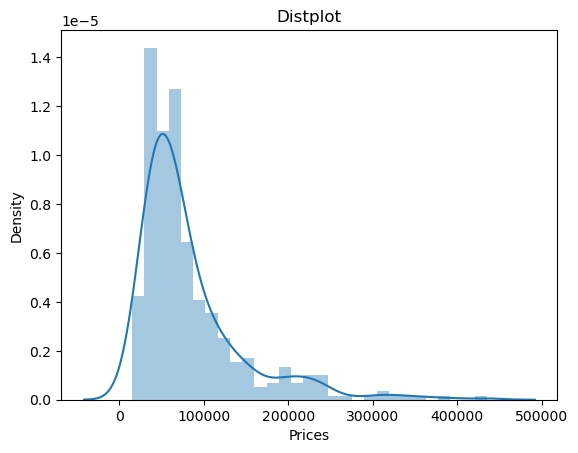

In [136]:
sns.distplot(final_df["Prices"])
plt.title("Distplot")
plt.show()

B:\Data Science doc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


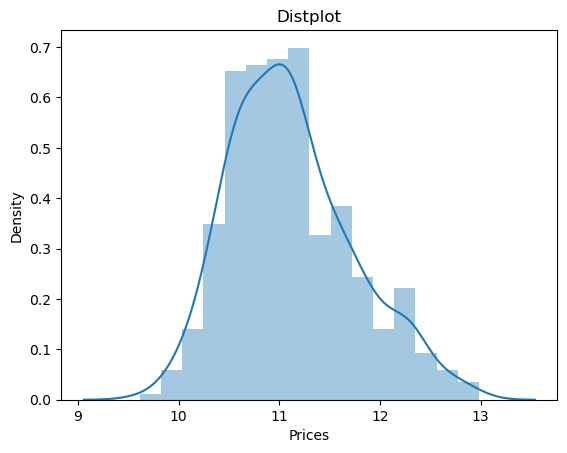

In [137]:
sns.distplot(np.log(final_df["Prices"]))
plt.title("Distplot")
plt.show()

<AxesSubplot:>

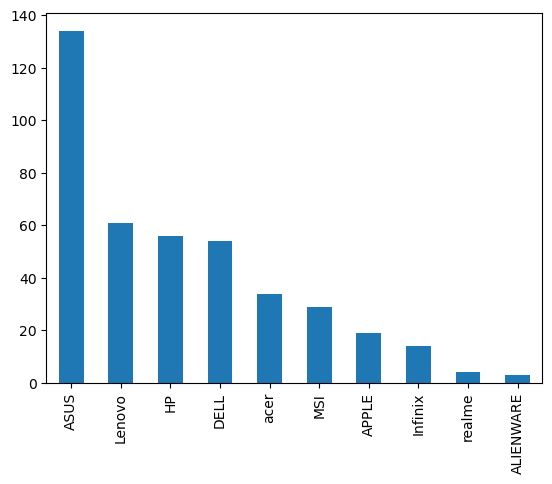

In [138]:
final_df["Company"].value_counts().plot(kind="bar")

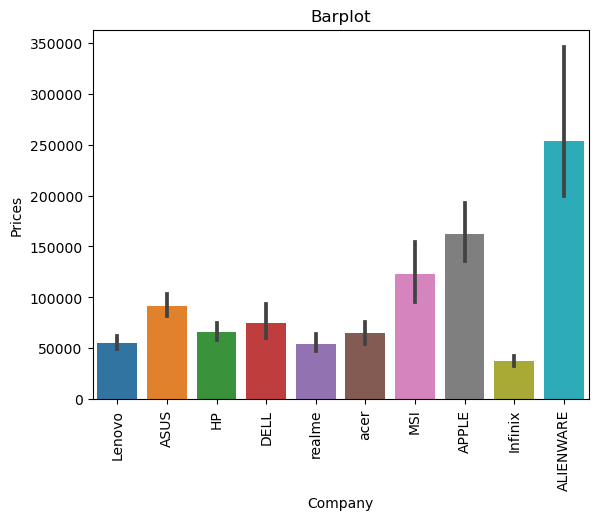

In [139]:
sns.barplot(x=final_df["Company"],y=final_df["Prices"])
plt.title("Barplot")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

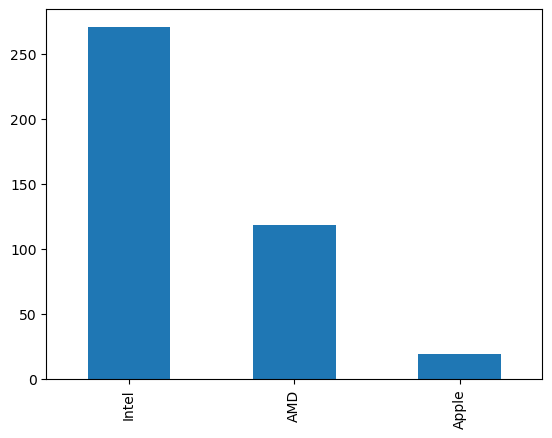

In [140]:
final_df["ProcessorName"].value_counts().plot(kind='bar')

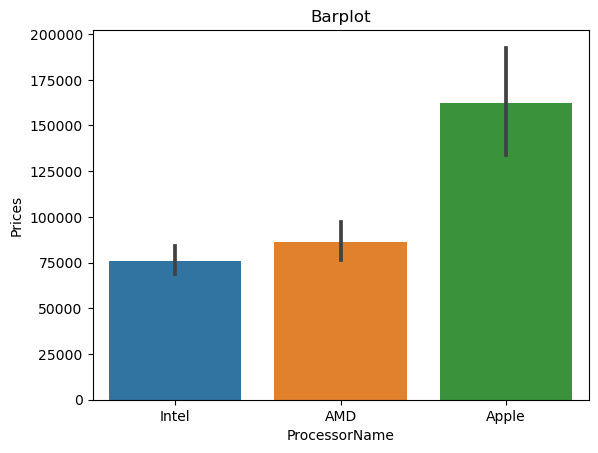

In [141]:
sns.barplot(x=final_df["ProcessorName"],y=final_df["Prices"])
plt.title("Barplot")
plt.show()

<AxesSubplot:>

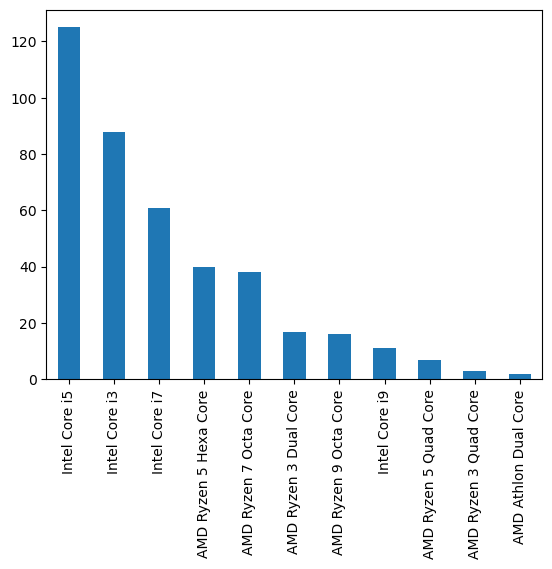

In [142]:
final_df["Processor"].value_counts().plot(kind='bar')

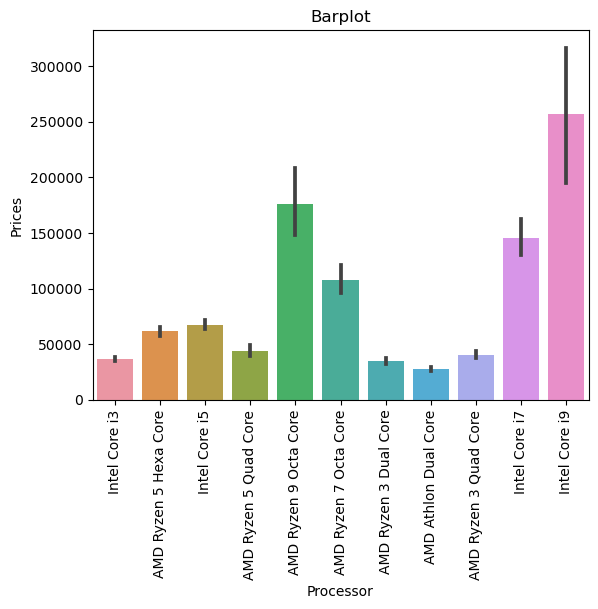

In [143]:
sns.barplot(x=final_df["Processor"],y=final_df["Prices"])
plt.title("Barplot")
plt.xticks(rotation=90)
plt.show()

B:\Data Science doc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ScreenSize_in_Inch', ylabel='Density'>

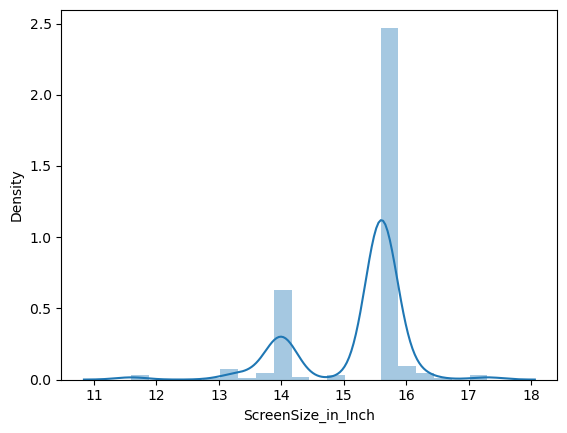

In [165]:
sns.distplot(final_df["ScreenSize_in_Inch"])

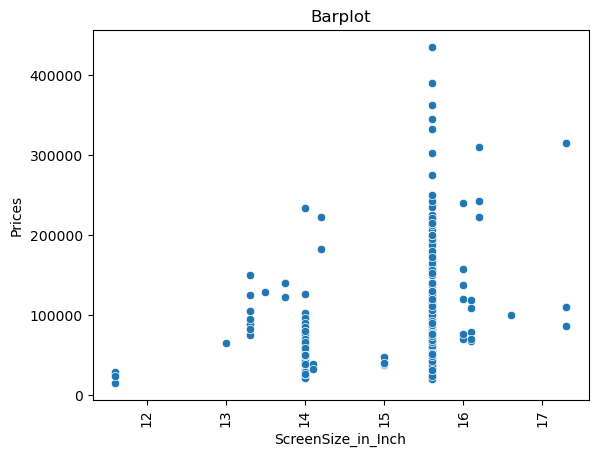

In [166]:
sns.scatterplot(x=final_df["ScreenSize_in_Inch"],y=final_df["Prices"])
plt.title("Barplot")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

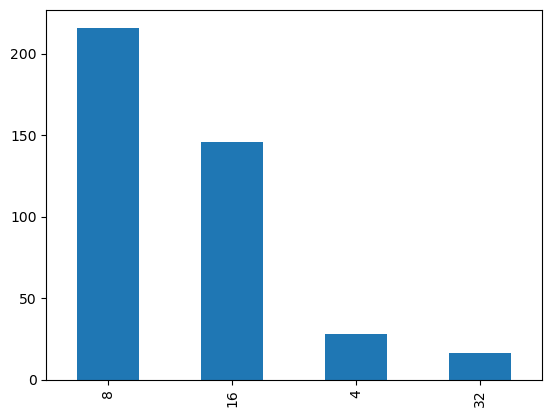

In [167]:
final_df["RAM_in_GB"].value_counts().plot(kind="bar") 

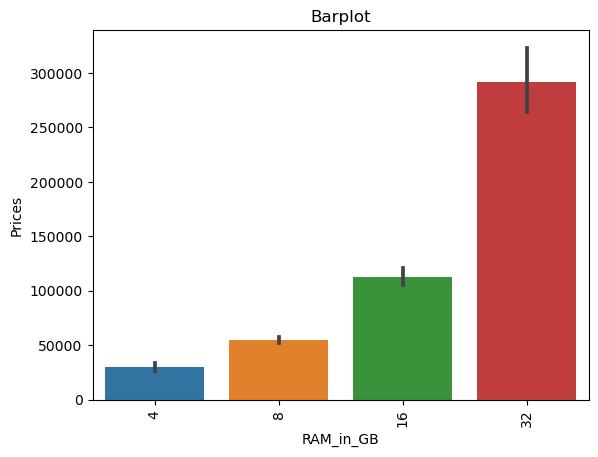

In [168]:
sns.barplot(x=final_df["RAM_in_GB"],y=final_df["Prices"])
plt.title("Barplot")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

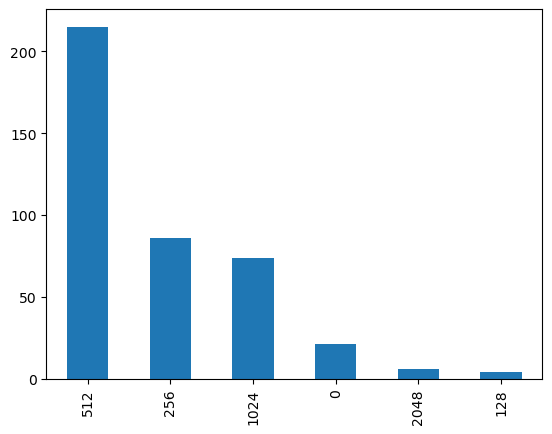

In [169]:
final_df["SSD_in_GB"].value_counts().plot(kind="bar") 

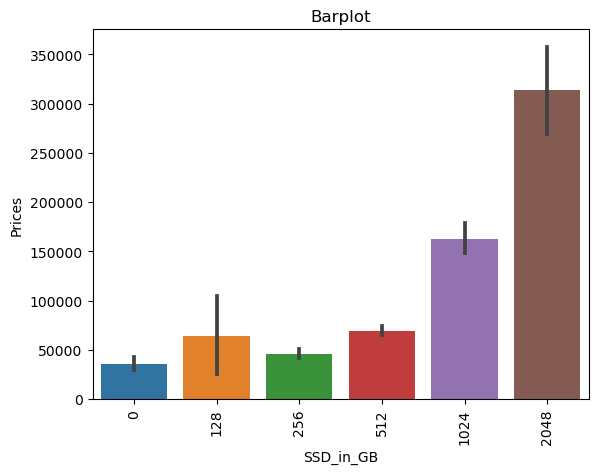

In [170]:
sns.barplot(x=final_df["SSD_in_GB"],y=final_df["Prices"])
plt.title("Barplot")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

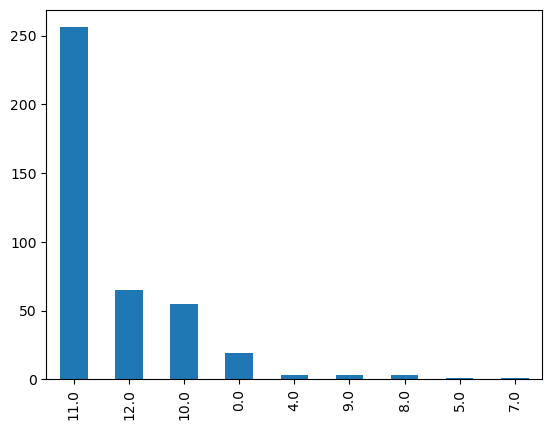

In [171]:
final_df["Gen"].value_counts().plot(kind="bar") 

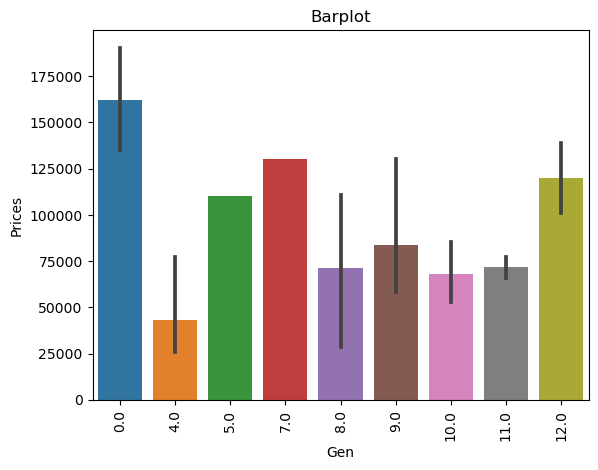

In [172]:
sns.barplot(x=final_df["Gen"],y=final_df["Prices"])
plt.title("Barplot")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

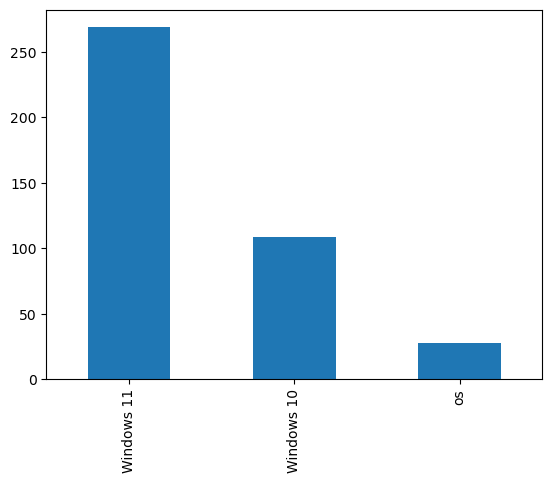

In [173]:
final_df["OperatingSystem"].value_counts().plot(kind="bar") 

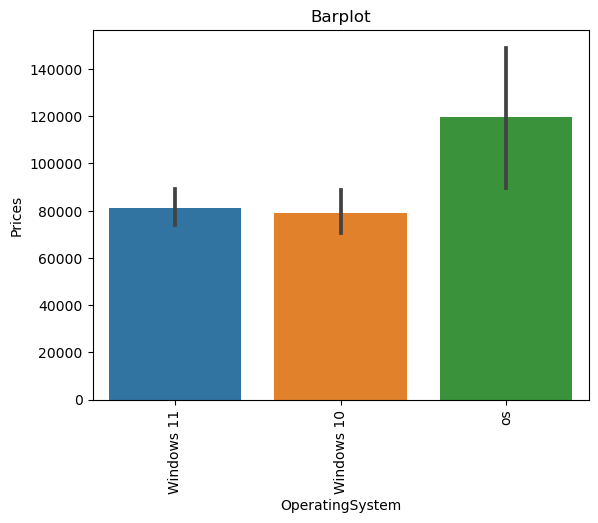

In [174]:
sns.barplot(x=final_df["OperatingSystem"],y=final_df["Prices"])
plt.title("Barplot")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

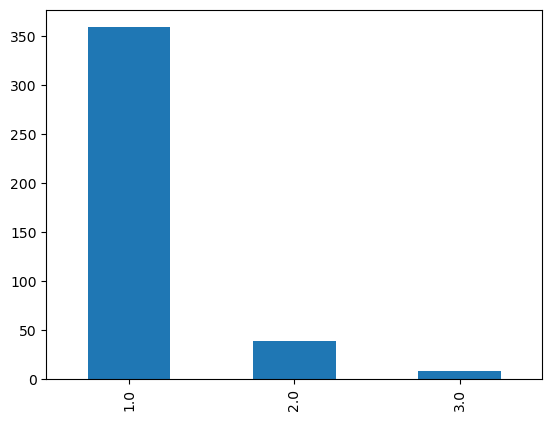

In [175]:
final_df["Warranty_in_Year"].value_counts().plot(kind="bar") 

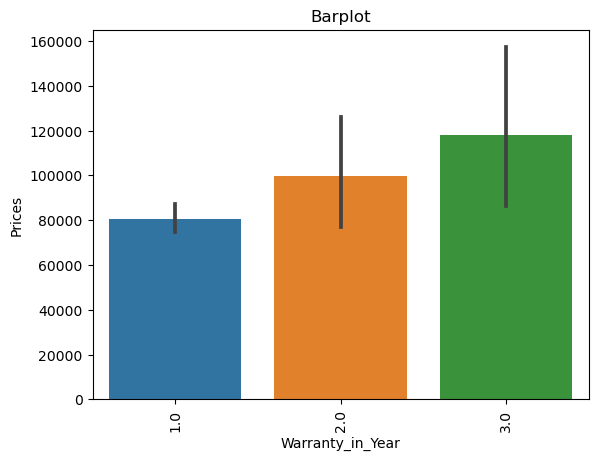

In [176]:
sns.barplot(x=final_df["Warranty_in_Year"],y=final_df["Prices"])
plt.title("Barplot")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

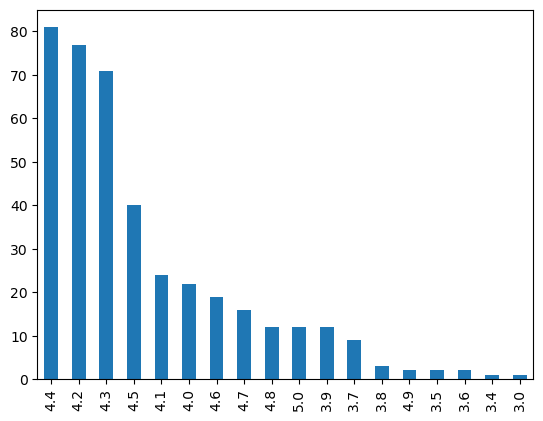

In [177]:
final_df["Rating"].value_counts().plot(kind="bar") 

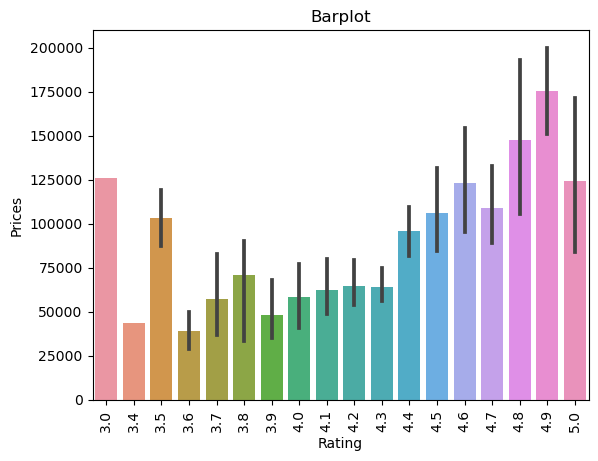

In [178]:
sns.barplot(x=final_df["Rating"],y=final_df["Prices"])
plt.title("Barplot")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

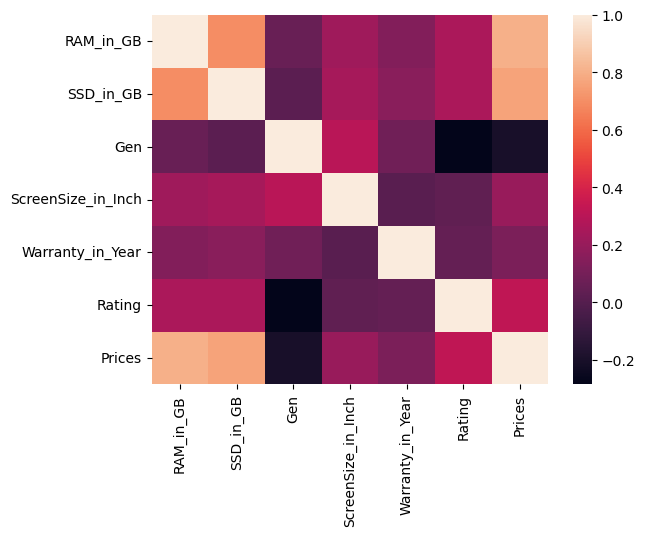

In [179]:
sns.heatmap(final_df.corr())

In [ ]:
#final_df=final_df.drop(final_df[final_df['Processor'] == 'AMD Athlon Dual Core'].index)

In [ ]:
final_df

In [ ]:
# plt.figure(figsize=(7,6))
# plt.pie(df["cb_person_default_on_file"].value_counts(),labels=df["cb_person_default_on_file"].unique(),autopct="%.0f%%",data=df)
# plt.title("pie chart")
# plt.show

In [ ]:
final_df.info()

In [158]:
final_df=pd.read_csv("Laptop_price_prediction_cleaned1.csv")

In [159]:
final_df.drop(columns="Unnamed: 0",axis=1,inplace=True)

## Spliting Data into Train and Test

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
x_train,x_test,y_train,y_test=train_test_split(final_df.drop("Prices",axis=1),final_df["Prices"],test_size=0.25, random_state =45 )

In [180]:
x_train_obj=x_train.select_dtypes("object")

In [181]:
x_train_obj

,Company,ProcessorName,Processor,OperatingSystem
306,ASUS,AMD,AMD Ryzen 7 Octa Core,Windows 11
91,Lenovo,Intel,Intel Core i5,Windows 11
349,MSI,Intel,Intel Core i7,Windows 11
47,APPLE,Apple,Intel Core i5,os
255,Lenovo,Intel,Intel Core i3,Windows 10
...,...,...,...,...
213,HP,AMD,AMD Ryzen 7 Octa Core,Windows 11
95,DELL,Intel,AMD Ryzen 3 Dual Core,Windows 11
32,acer,AMD,AMD Ryzen 5 Hexa Core,Windows 11
380,ASUS,Intel,Intel Core i3,Windows 10


In [182]:
x_train_num=x_train.select_dtypes(["int","float"])

In [183]:
x_train_num

,RAM_in_GB,SSD_in_GB,Gen,ScreenSize_in_Inch,Warranty_in_Year,Rating
306,16,1024,11.0,15.60,1.0,4.0
91,16,512,12.0,15.60,2.0,4.1
349,16,1024,12.0,15.60,2.0,3.7
47,8,512,0.0,13.75,1.0,4.7
255,4,256,4.0,11.60,1.0,3.9
...,...,...,...,...,...,...
213,16,1024,11.0,16.10,1.0,3.5
95,8,0,11.0,15.60,1.0,3.8
32,16,512,11.0,15.60,1.0,4.4
380,8,0,10.0,14.10,1.0,3.9


## Convert Object Train Data into OneHotEncoder

In [184]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn import set_config

In [185]:
oe=OneHotEncoder(drop="first",sparse_output=False)
mx=MinMaxScaler()
sc=StandardScaler()

In [186]:
x_train_obj_oe=pd.DataFrame(oe.fit_transform(x_train_obj),index=x_train_obj.index,columns=oe.get_feature_names_out(x_train_obj.columns))

In [187]:
x_train_obj_oe

,Company_APPLE,Company_ASUS,Company_DELL,Company_HP,Company_Infinix,Company_Lenovo,Company_MSI,Company_acer,Company_realme,ProcessorName_Apple,...,Processor_AMD Ryzen 5 Hexa Core,Processor_AMD Ryzen 5 Quad Core,Processor_AMD Ryzen 7 Octa Core,Processor_AMD Ryzen 9 Octa Core,Processor_Intel Core i3,Processor_Intel Core i5,Processor_Intel Core i7,Processor_Intel Core i9,OperatingSystem_Windows 11,OperatingSystem_os
306,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
91,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
349,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
47,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
255,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
380,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [188]:
set_config(transform_output='pandas')

In [189]:
x_train_obj_processed=oe.fit_transform(x_train_obj)

In [190]:
x_train_obj_processed

,Company_APPLE,Company_ASUS,Company_DELL,Company_HP,Company_Infinix,Company_Lenovo,Company_MSI,Company_acer,Company_realme,ProcessorName_Apple,...,Processor_AMD Ryzen 5 Hexa Core,Processor_AMD Ryzen 5 Quad Core,Processor_AMD Ryzen 7 Octa Core,Processor_AMD Ryzen 9 Octa Core,Processor_Intel Core i3,Processor_Intel Core i5,Processor_Intel Core i7,Processor_Intel Core i9,OperatingSystem_Windows 11,OperatingSystem_os
306,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
91,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
349,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
47,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
255,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
380,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Convert Numerical Train Data into StandardScaler

In [191]:
x_train_num_df=pd.DataFrame(sc.fit_transform(x_train_num),index=x_train_num.index,columns=x_train_num.columns)

In [192]:
x_train_num_df

,RAM_in_GB,SSD_in_GB,Gen,ScreenSize_in_Inch,Warranty_in_Year,Rating
306,0.762471,1.507927,0.283908,0.472387,-0.354408,-1.110751
91,0.762471,-0.027784,0.646546,0.472387,2.210833,-0.756429
349,0.762471,1.507927,0.646546,0.472387,2.210833,-2.173714
47,-0.581246,-0.027784,-3.705115,-1.657235,-0.354408,1.369498
255,-1.253104,-0.795640,-2.254561,-4.132201,-0.354408,-1.465072
...,...,...,...,...,...,...
213,0.762471,1.507927,0.283908,1.047960,-0.354408,-2.882357
95,-0.581246,-1.563495,0.283908,0.472387,-0.354408,-1.819393
32,0.762471,-0.027784,0.283908,0.472387,-0.354408,0.306535
380,-0.581246,-1.563495,-0.078731,-1.254334,-0.354408,-1.465072


In [193]:
x_train_processed=x_train_num_df.merge(x_train_obj_oe,left_index=True,right_index=True)

In [194]:
x_train_processed

,RAM_in_GB,SSD_in_GB,Gen,ScreenSize_in_Inch,Warranty_in_Year,Rating,Company_APPLE,Company_ASUS,Company_DELL,Company_HP,...,Processor_AMD Ryzen 5 Hexa Core,Processor_AMD Ryzen 5 Quad Core,Processor_AMD Ryzen 7 Octa Core,Processor_AMD Ryzen 9 Octa Core,Processor_Intel Core i3,Processor_Intel Core i5,Processor_Intel Core i7,Processor_Intel Core i9,OperatingSystem_Windows 11,OperatingSystem_os
306,0.762471,1.507927,0.283908,0.472387,-0.354408,-1.110751,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
91,0.762471,-0.027784,0.646546,0.472387,2.210833,-0.756429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
349,0.762471,1.507927,0.646546,0.472387,2.210833,-2.173714,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
47,-0.581246,-0.027784,-3.705115,-1.657235,-0.354408,1.369498,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
255,-1.253104,-0.795640,-2.254561,-4.132201,-0.354408,-1.465072,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.762471,1.507927,0.283908,1.047960,-0.354408,-2.882357,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95,-0.581246,-1.563495,0.283908,0.472387,-0.354408,-1.819393,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32,0.762471,-0.027784,0.283908,0.472387,-0.354408,0.306535,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
380,-0.581246,-1.563495,-0.078731,-1.254334,-0.354408,-1.465072,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [195]:
x_test_obj=x_test.select_dtypes("object")
x_test_num=x_test.select_dtypes(["int","float"])

In [196]:
x_test_obj

,Company,ProcessorName,Processor,OperatingSystem
125,acer,AMD,AMD Ryzen 5 Quad Core,Windows 10
260,MSI,Intel,Intel Core i7,Windows 10
219,ASUS,Intel,Intel Core i9,Windows 11
217,ASUS,Intel,Intel Core i3,Windows 10
372,Infinix,Intel,Intel Core i3,Windows 11
...,...,...,...,...
157,Lenovo,Intel,Intel Core i5,Windows 10
335,DELL,Intel,Intel Core i7,Windows 11
387,DELL,AMD,AMD Ryzen 7 Octa Core,Windows 11
300,DELL,AMD,AMD Ryzen 7 Octa Core,Windows 11


In [197]:
x_test_num

,RAM_in_GB,SSD_in_GB,Gen,ScreenSize_in_Inch,Warranty_in_Year,Rating
125,8,512,11.0,15.6,1.0,4.4
260,16,512,11.0,15.6,2.0,4.6
219,32,1024,12.0,15.6,1.0,5.0
217,4,256,8.0,15.6,1.0,4.3
372,8,512,11.0,14.0,1.0,4.1
...,...,...,...,...,...,...
157,8,512,11.0,15.6,2.0,4.3
335,16,512,11.0,15.6,1.0,4.2
387,16,512,11.0,15.6,1.0,4.2
300,16,1024,11.0,15.6,1.0,4.2


## Convert Object Test Data into OneHotEncoder

In [198]:
x_test_obj_oe=oe.fit_transform(x_test_obj)

In [199]:
x_test_obj_oe

,Company_APPLE,Company_ASUS,Company_DELL,Company_HP,Company_Infinix,Company_Lenovo,Company_MSI,Company_acer,Company_realme,ProcessorName_Apple,...,Processor_AMD Ryzen 5 Hexa Core,Processor_AMD Ryzen 5 Quad Core,Processor_AMD Ryzen 7 Octa Core,Processor_AMD Ryzen 9 Octa Core,Processor_Intel Core i3,Processor_Intel Core i5,Processor_Intel Core i7,Processor_Intel Core i9,OperatingSystem_Windows 11,OperatingSystem_os
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
219,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
217,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
372,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
335,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
387,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
300,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Convert Numerical test Data into StandardScaler

In [200]:
x_test_num_sc=sc.transform(x_test_num)

In [201]:
x_test_num_sc

,RAM_in_GB,SSD_in_GB,Gen,ScreenSize_in_Inch,Warranty_in_Year,Rating
125,-0.581246,-0.027784,0.283908,0.472387,-0.354408,0.306535
260,0.762471,-0.027784,0.283908,0.472387,2.210833,1.015177
219,3.449903,1.507927,0.646546,0.472387,-0.354408,2.432462
217,-1.253104,-0.795640,-0.804007,0.472387,-0.354408,-0.047787
372,-0.581246,-0.027784,0.283908,-1.369448,-0.354408,-0.756429
...,...,...,...,...,...,...
157,-0.581246,-0.027784,0.283908,0.472387,2.210833,-0.047787
335,0.762471,-0.027784,0.283908,0.472387,-0.354408,-0.402108
387,0.762471,-0.027784,0.283908,0.472387,-0.354408,-0.402108
300,0.762471,1.507927,0.283908,0.472387,-0.354408,-0.402108


In [202]:
x_test_processed=x_test_num_sc.merge(x_test_obj_oe,left_index=True,right_index=True)

In [203]:
x_test_processed

,RAM_in_GB,SSD_in_GB,Gen,ScreenSize_in_Inch,Warranty_in_Year,Rating,Company_APPLE,Company_ASUS,Company_DELL,Company_HP,...,Processor_AMD Ryzen 5 Hexa Core,Processor_AMD Ryzen 5 Quad Core,Processor_AMD Ryzen 7 Octa Core,Processor_AMD Ryzen 9 Octa Core,Processor_Intel Core i3,Processor_Intel Core i5,Processor_Intel Core i7,Processor_Intel Core i9,OperatingSystem_Windows 11,OperatingSystem_os
125,-0.581246,-0.027784,0.283908,0.472387,-0.354408,0.306535,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260,0.762471,-0.027784,0.283908,0.472387,2.210833,1.015177,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
219,3.449903,1.507927,0.646546,0.472387,-0.354408,2.432462,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
217,-1.253104,-0.795640,-0.804007,0.472387,-0.354408,-0.047787,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
372,-0.581246,-0.027784,0.283908,-1.369448,-0.354408,-0.756429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,-0.581246,-0.027784,0.283908,0.472387,2.210833,-0.047787,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
335,0.762471,-0.027784,0.283908,0.472387,-0.354408,-0.402108,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
387,0.762471,-0.027784,0.283908,0.472387,-0.354408,-0.402108,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
300,0.762471,1.507927,0.283908,0.472387,-0.354408,-0.402108,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Model Evaluation

In [204]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [205]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [206]:
from sklearn.model_selection import GridSearchCV

In [210]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Linear Regression

In [207]:
lr=LinearRegression()
lr

LinearRegression()

In [208]:
lr.fit(x_train_processed,y_train)
y_pred_lr=lr.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_lr))
print("MAE:",mean_absolute_error(y_test,y_pred_lr))
print("MSE:",mean_squared_error(y_test,y_pred_lr))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_lr))
Adj_score= 1-(1-r2_score(y_test,y_pred_lr))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.8262047986779382
MAE: 18111.22202397961
MSE: 628048855.7495317
MAPE: 0.23457081556143441
Adj_r2_score : 0.8051965875291175


## Linear Regression with PipeLine

In [211]:
step_1 = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop='first', sparse_output=False),[0,1,2,6]),
        ("sc", StandardScaler(),[3,4,5,7,8,9]),
    ]
)

reg = Pipeline(
    steps=[("preprocessor", step_1), ("regressor", LinearRegression())])
reg.fit(x_train_processed,y_train)
y_pred_lr=reg.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_lr))
Adj_score= 1-(1-r2_score(y_test,y_pred_lr))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.7919311156446825
Adj_r2_score : 0.7667799318215123


<AxesSubplot:xlabel='Prices', ylabel='Count'>

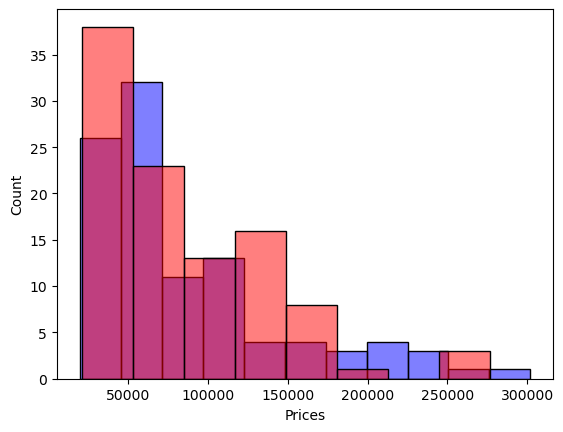

In [252]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_lr,color='red',alpha=0.5)

## K-Nearest Neighbors

In [212]:
y_pred__lr_train=lr.predict(x_train_processed)
print("R2_Score_train:",r2_score(y_train,y_pred__lr_train))

R2_Score_train: 0.8675052149562907


In [213]:
knn=KNeighborsRegressor(n_neighbors=3)
knn

KNeighborsRegressor(n_neighbors=3)

In [214]:
knn.fit(x_train_processed,y_train)
y_pred_knn=knn.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_knn))
print("MAE:",mean_absolute_error(y_test,y_pred_knn))
print("MSE:",mean_squared_error(y_test,y_pred_knn))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_knn))
Adj_score= 1-(1-r2_score(y_test,y_pred_knn))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.759337102268125
MAE: 17561.55555555556
MSE: 869690626.6230938
MAPE: 0.19840943302048533
Adj_r2_score : 0.7302459827620742


In [215]:
y_pred__knn_train=knn.predict(x_train_processed)
print("R2_Score_train:",r2_score(y_train,y_pred__knn_train))

R2_Score_train: 0.9072230196755725


## K-Nearest Neighbors with Cross Validation

In [216]:
parameter={"n_neighbors":[5,6,7],
           "weights":['uniform', 'distance'],
           "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}
knnregressor=KNeighborsRegressor()

In [217]:
knnregressor_cv=GridSearchCV(knnregressor,param_grid=parameter,cv=6,scoring="neg_mean_squared_log_error")

In [218]:
knnregressor_cv.fit(x_train_processed,y_train)

GridSearchCV(cv=6, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 6, 7],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_log_error')

In [219]:
knnregressor_cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}

In [220]:
y_pred_knn=knnregressor_cv.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_knn))
print("MAE:",mean_absolute_error(y_test,y_pred_knn))
print("MSE:",mean_squared_error(y_test,y_pred_knn))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_knn))
Adj_score= 1-(1-r2_score(y_test,y_pred_knn))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.8059677510557495
MAE: 16466.955141517617
MSE: 701180072.8727916
MAPE: 0.1875048340656703
Adj_r2_score : 0.7825133033811698


## Knn with Pipeline

In [221]:
step_1 = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop='first', sparse_output=False),[0,1,2,6]),
        ("sc", StandardScaler(),[3,4,5,7,8,9]),
    ]
)

reg1 = Pipeline(
    steps=[("preprocessor", step_1), ("regressor", knnregressor_cv)])
reg1.fit(x_train_processed,y_train)
y_pred_knn=reg1.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_knn))
Adj_score= 1-(1-r2_score(y_test,y_pred_knn))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.6786075166343429
Adj_r2_score : 0.6397578757879449


<AxesSubplot:xlabel='Prices', ylabel='Count'>

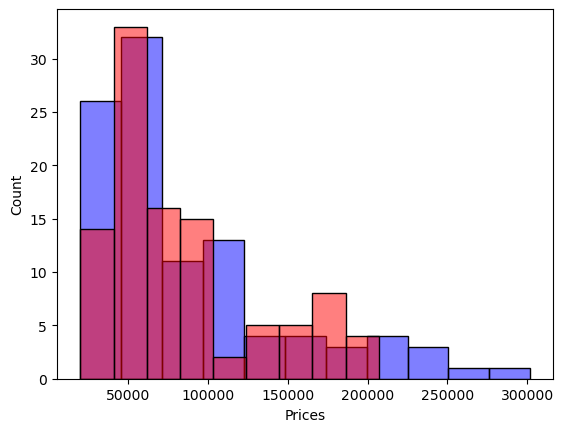

In [253]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_knn,color='red',alpha=0.5)

## Decision Tree

In [222]:
dt=DecisionTreeRegressor()
dt.fit(x_train_processed,y_train)
y_pred_dt=dt.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_dt))
print("MAE:",mean_absolute_error(y_test,y_pred_dt))
print("MSE:",mean_squared_error(y_test,y_pred_dt))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_dt))
Adj_score= 1-(1-r2_score(y_test,y_pred_dt))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.578045634054317
MAE: 23769.86274509804
MSE: 1524828963.6007624
MAPE: 0.2419084934051743
Adj_r2_score : 0.527040161247696


In [223]:
y_pred__dt_train=dt.predict(x_train_processed)
print("R2_Score_train:",r2_score(y_train,y_pred__dt_train))

R2_Score_train: 0.9951152729803701


## Decision Tree with Cross Validation

In [224]:
parameter1={"criterion":["squared_error", "friedman_mse", "absolute_error"],
           "splitter":["best", "random"],
           "max_depth":[1,2,3,4,5,6,7,8,9,10],"max_features":["auto", "sqrt", "log2"]}
decisionTree=DecisionTreeRegressor()

In [225]:
decisionTree_cv=GridSearchCV(decisionTree,param_grid=parameter1,cv=6,scoring="neg_mean_squared_log_error")

In [226]:
decisionTree_cv.fit(x_train_processed,y_train)

B:\Data Science doc\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
B:\Data Science doc\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
B:\Data Science doc\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
B:\Data Science doc\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
B:\Data Science doc\lib\site-package

GridSearchCV(cv=6, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_log_error')

In [227]:
decisionTree_cv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 8,
 'max_features': 'auto',
 'splitter': 'random'}

In [228]:
y_pred_dt=decisionTree_cv.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_dt))
print("MAE:",mean_absolute_error(y_test,y_pred_dt))
print("MSE:",mean_squared_error(y_test,y_pred_dt))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_dt))
Adj_score= 1-(1-r2_score(y_test,y_pred_dt))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.5966540271017726
MAE: 23708.31433326287
MSE: 1457583263.6511145
MAPE: 0.2671521456731904
Adj_r2_score : 0.5478979204877013


## Decision Tree with PipeLine

In [229]:
step_1 = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop='first', sparse_output=False),[0,1,2,6]),
        ("sc", StandardScaler(),[3,4,5,7,8,9]),
    ]
)

reg2 = Pipeline(
    steps=[("preprocessor", step_1), ("regressor", decisionTree_cv)])
reg2.fit(x_train_processed,y_train)
y_pred_dt=reg2.predict(x_test_processed)


B:\Data Science doc\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
B:\Data Science doc\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
B:\Data Science doc\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
B:\Data Science doc\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
B:\Data Science doc\lib\site-package

In [230]:
print("R2_Score:",r2_score(y_test,y_pred_dt))
Adj_score= 1-(1-r2_score(y_test,y_pred_dt))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.6334516842710554
Adj_r2_score : 0.589143646106018


<AxesSubplot:xlabel='Prices', ylabel='Count'>

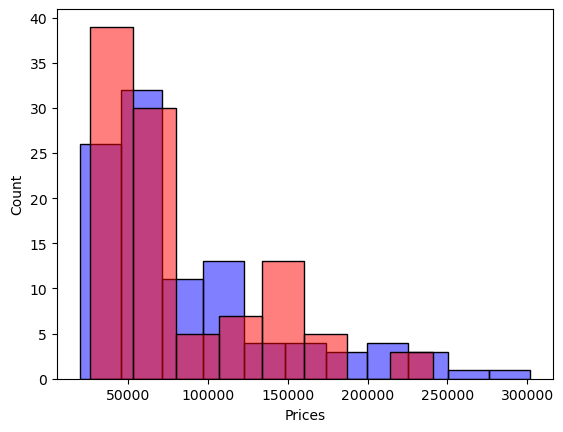

In [266]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_dt,color='red',alpha=0.5)

## Random Forest

In [231]:
rf=RandomForestRegressor()
rf.fit(x_train_processed,y_train)
y_pred_rf=rf.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_rf))
print("MAE:",mean_absolute_error(y_test,y_pred_rf))
print("MSE:",mean_squared_error(y_test,y_pred_rf))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_rf))
Adj_score= 1-(1-r2_score(y_test,y_pred_rf))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.7533609477208552
MAE: 18577.716443574398
MSE: 891286832.9431974
MAPE: 0.19577031750016494
Adj_r2_score : 0.7235474359068926


In [232]:
y_pred__rf_train=rf.predict(x_train_processed)
print("R2_Score_train:",r2_score(y_train,y_pred__rf_train))

R2_Score_train: 0.9776863633536844


## Random Forest with Cross validation

In [233]:
parameter2={"n_estimators":[20,30,40,50,60],"criterion":["squared_error", "absolute_error", "friedman_mse", "poisson"],
           "max_depth":[1,2,3,4,5,6,7,8,9],"max_features":["sqrt", "log2", None],"ccp_alpha":[0.1,0.2,0.3]}
RandomForest=RandomForestRegressor()

In [234]:
RandomForest_cv =GridSearchCV(RandomForest,param_grid=parameter2,cv=5,scoring="neg_mean_squared_log_error")

In [235]:
RandomForest_cv.fit(x_train_processed,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0.1, 0.2, 0.3],
                         'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [20, 30, 40, 50, 60]},
             scoring='neg_mean_squared_log_error')

In [236]:
RandomForest_cv.best_params_

{'ccp_alpha': 0.2,
 'criterion': 'absolute_error',
 'max_depth': 9,
 'max_features': None,
 'n_estimators': 20}

In [237]:
y_pred_rf_cv=RandomForest_cv.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_rf_cv))
print("MAE:",mean_absolute_error(y_test,y_pred_rf_cv))
print("MSE:",mean_squared_error(y_test,y_pred_rf_cv))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_rf_cv))
Adj_score= 1-(1-r2_score(y_test,y_pred_rf_cv))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.7657659920886533
MAE: 18841.811764705883
MSE: 846458357.4648653
MAPE: 0.20721392830075766
Adj_r2_score : 0.7374519911323366


## Random Forest with PipeLine

In [251]:
step_1 = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop='first', sparse_output=False),[0,1,2,6]),
        ("sc", StandardScaler(),[3,4,5,7,8,9]),
    ]
)

reg3 = Pipeline(
    steps=[("preprocessor", step_1), ("regressor", RandomForest_cv)])
reg3.fit(x_train_processed,y_train)
y_pred_rf=reg3.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_rf))
Adj_score= 1-(1-r2_score(y_test,y_pred_rf))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)


R2_Score: 0.7690708831844565
Adj_r2_score : 0.7411563745584018


<AxesSubplot:xlabel='Prices', ylabel='Count'>

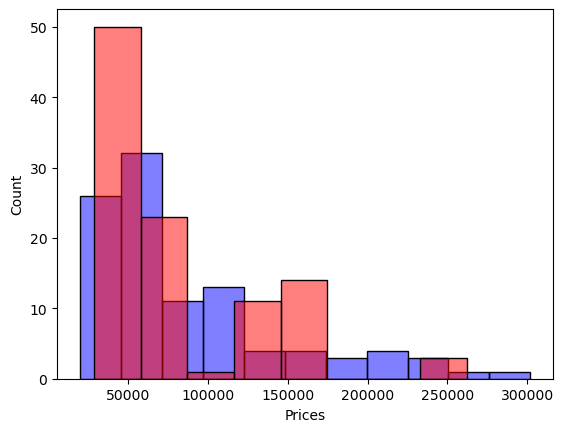

In [255]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_rf,color='red',alpha=0.5)

## Extra Trees

In [238]:
et=ExtraTreesRegressor()
et.fit(x_train_processed,y_train)
y_pred_et=et.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_et))
print("MAE:",mean_absolute_error(y_test,y_pred_et))
print("MSE:",mean_squared_error(y_test,y_pred_et))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_et))
Adj_score= 1-(1-r2_score(y_test,y_pred_et))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.6131725786508967
MAE: 22675.007075163398
MSE: 1397889685.6918356
MAPE: 0.23146824942563132
Adj_r2_score : 0.5664132200262799


In [239]:
y_pred__et_train=et.predict(x_train_processed)
print("R2_Score_train:",r2_score(y_train,y_pred__et_train))

R2_Score_train: 0.9951152729803701


## Extra Tree With Cross Validation

In [246]:
parameter3={"n_estimators":[20,30,40,50,60],"criterion":["squared_error", "absolute_error", "friedman_mse", "poisson"],
           "max_depth":[1,2,3,4,5,6,7,8,9],"max_features":["sqrt", "log2", None],"ccp_alpha":[0.1,0.2,0.3]}
ExtraTree=ExtraTreesRegressor()

In [247]:
ExtraTree_cv =GridSearchCV(ExtraTree,param_grid=parameter3,cv=5,scoring="neg_mean_squared_log_error")

In [248]:
ExtraTree_cv.fit(x_train_processed,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'ccp_alpha': [0.1, 0.2, 0.3],
                         'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [20, 30, 40, 50, 60]},
             scoring='neg_mean_squared_log_error')

In [249]:
ExtraTree_cv.best_params_

{'ccp_alpha': 0.3,
 'criterion': 'friedman_mse',
 'max_depth': 9,
 'max_features': None,
 'n_estimators': 50}

In [250]:
y_pred_extra_cv=ExtraTree_cv.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_extra_cv))
print("MAE:",mean_absolute_error(y_test,y_pred_extra_cv))
print("MSE:",mean_squared_error(y_test,y_pred_extra_cv))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_extra_cv))
Adj_score= 1-(1-r2_score(y_test,y_pred_extra_cv))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.6238883304240289
MAE: 22640.50460911415
MSE: 1359165856.7919788
MAPE: 0.24403002412643598
Adj_r2_score : 0.5784242824533071


<AxesSubplot:xlabel='Prices', ylabel='Count'>

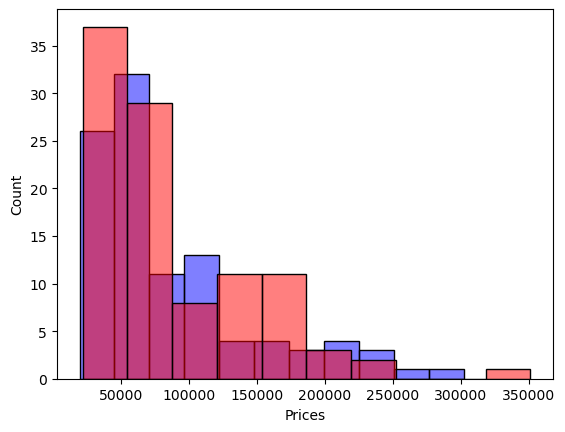

In [256]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_extra_cv,color='red',alpha=0.5)

## GBDT 

In [240]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train_processed,y_train)
y_pred_gbr=gbr.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_gbr))
print("MAE:",mean_absolute_error(y_test,y_pred_gbr))
print("MSE:",mean_squared_error(y_test,y_pred_gbr))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_gbr))
Adj_score= 1-(1-r2_score(y_test,y_pred_gbr))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.7416096140841741
MAE: 20186.349494413636
MSE: 933752974.6312624
MAPE: 0.22626666083936356
Adj_r2_score : 0.7103756113910523


In [241]:
y_pred__gbr_train=gbr.predict(x_train_processed)
print("R2_Score_train:",r2_score(y_train,y_pred__gbr_train))

R2_Score_train: 0.9707281307445975


<AxesSubplot:xlabel='Prices', ylabel='Count'>

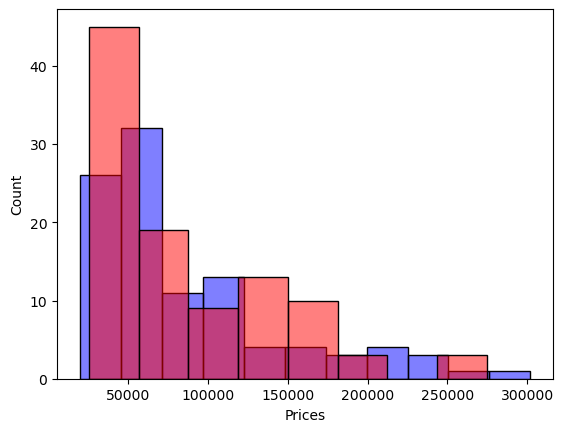

In [260]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_gbr,color='red',alpha=0.5)

## GBDT with Cross Validation

In [263]:
parameter4={"loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
            "n_estimators":[20,30,40,50,60],"criterion":['friedman_mse', 'squared_error'],
           "max_depth":[1,2,3,4,5,6,7,8,9],"max_features":['auto', 'sqrt', 'log2'],"ccp_alpha":[0.1,0.2,0.3]}
Gbdt=GradientBoostingRegressor()

In [264]:
Gbdt_cv =GridSearchCV(Gbdt,param_grid=parameter4,cv=5,scoring="neg_mean_squared_log_error")

## AdaBoost

In [242]:
abr=AdaBoostRegressor()
abr.fit(x_train_processed,y_train)
y_pred_abr=abr.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_abr))
print("MAE:",mean_absolute_error(y_test,y_pred_abr))
print("MSE:",mean_squared_error(y_test,y_pred_abr))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_gbr))
Adj_score= 1-(1-r2_score(y_test,y_pred_abr))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.7135960905155674
MAE: 25908.653668433908
MSE: 1034986272.7254523
MAPE: 0.22626666083936356
Adj_r2_score : 0.6789758377207459


In [243]:
y_pred__abr_train=abr.predict(x_train_processed)
print("R2_Score_train:",r2_score(y_train,y_pred__abr_train))

R2_Score_train: 0.8545067660641165


<AxesSubplot:xlabel='Prices', ylabel='Count'>

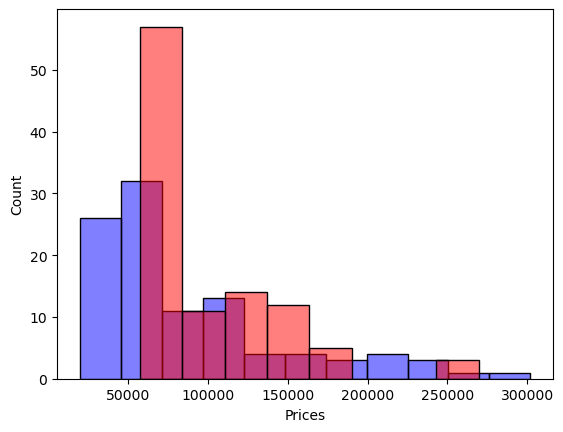

In [261]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_abr,color='red',alpha=0.5)

## XG Boost 

In [244]:
xgb=XGBRegressor(n_estimators=50,
                              random_state=3,
                              max_features=0.70,
                              max_depth=3)
xgb.fit(x_train_processed,y_train)
y_pred_xgb=xgb.predict(x_test_processed)
print("R2_Score:",r2_score(y_test,y_pred_xgb))
print("MAE:",mean_absolute_error(y_test,y_pred_xgb))
print("MSE:",mean_squared_error(y_test,y_pred_xgb))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_xgb))
Adj_score= 1-(1-r2_score(y_test,y_pred_xgb))*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1)
print("Adj_r2_score :",Adj_score)

R2_Score: 0.7484470747535932
MAE: 19103.816808363972
MSE: 909044240.9205813
MAPE: 0.20982981440725246
Adj_r2_score : 0.7180395782952363


B:\Data Science doc\lib\site-packages\xgboost\core.py:160: UserWarning: [16:02:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)


In [245]:
y_pred__xgb_train=xgb.predict(x_train_processed)
print("R2_Score_train:",r2_score(y_train,y_pred__xgb_train))

R2_Score_train: 0.9729288403305085


<AxesSubplot:xlabel='Prices', ylabel='Count'>

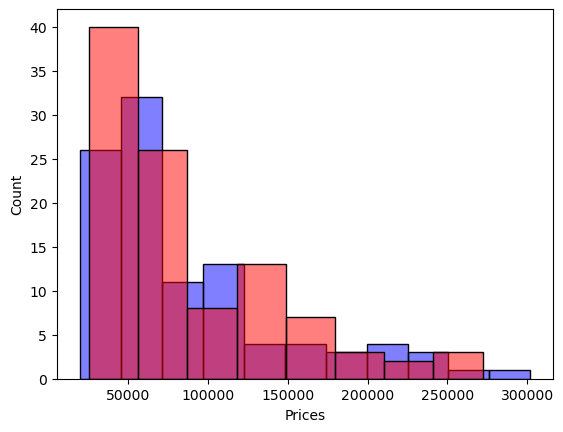

In [262]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_xgb,color='red',alpha=0.5)

In [ ]:
import platform

print(platform.python_version())

In [ ]:
import pickle

pickle.dump(final_df,open('final_df.pkl','wb'))
pickle.dump(lr,open('lr.pkl','wb'))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
step_1 = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop='first', sparse_output=False),[0,1,2,6]),
        ("sc", StandardScaler(),[3,4,5,7,8,9]),
    ]
)

reg = Pipeline(
    steps=[("preprocessor", step_1), ("regressor", LinearRegression())])


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

B:\Data Science doc\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
import pandas as pd

In [7]:
lr_r2_score=0.8262
knn_r2_score=0.7593
dt_r2_score=0.5780
rf_r2_score=0.7533
ex_r2_score=0.6131
gbdt_r2_score=0.7416
ada_r2_score=0.7135
xg_r2_score=0.7484

In [3]:
lr_adj_r2_score=0.80519
knn_adj_r2_score=0.7302
dt_adj_r2_score=0.52704
rf_adj_r2_score=0.72354
ex_adj_r2_score=0.5664
gbdt_adj_r2_score=0.7103
ada_adj_r2_score=0.6789
xg_adj_r2_score=0.7180

In [4]:
lr_mae=18111.22
knn_mae=17561.555
dt_mae=23769.862
rf_mae=18577.716
ex_mae=22675.007
gbdt_mae=20186.349
ada_mae=25908.653
xg_mae=19103.816

In [5]:
lr_mape=0.23457
knn_mape=0.19840
dt_mape=0.24190
rf_mape=0.19577
ex_mape=0.23146
gbdt_mape=0.22626
ada_mape=0.2262
xg_mape=0.2098

In [8]:
model=[("Linear Regression",lr_r2_score,lr_adj_r2_score,lr_mae,lr_mape),("KNN Regressor",knn_r2_score,knn_adj_r2_score,knn_mae,knn_mape),
       ("Decision Tree ",dt_r2_score,dt_adj_r2_score,dt_mae,dt_mape),
       ("Random Forest",rf_r2_score,rf_adj_r2_score,rf_mae,rf_mape),("Extra Tree",ex_r2_score,ex_adj_r2_score,ex_mae,ex_mape),("GBDT",gbdt_r2_score,gbdt_adj_r2_score,gbdt_mae,gbdt_mape),
      ("AdaBOOST",ada_r2_score,ada_adj_r2_score,ada_mae,ada_mape),("XGBOOST",xg_r2_score,xg_adj_r2_score,xg_mae,xg_mape)]
    

In [9]:
predict=pd.DataFrame(data=model,columns=["Algorithm","R2_Score","Adj_R2_Score","MAE","MAPE"],index=[1,2,3,4,5,6,7,8])
predict.sort_values(by='R2_Score',ascending=False)

,Algorithm,R2_Score,Adj_R2_Score,MAE,MAPE
1,Linear Regression,0.8262,0.80519,18111.220,0.23457
2,KNN Regressor,0.7593,0.73020,17561.555,0.19840
4,Random Forest,0.7533,0.72354,18577.716,0.19577
8,XGBOOST,0.7484,0.71800,19103.816,0.20980
6,GBDT,0.7416,0.71030,20186.349,0.22626
7,AdaBOOST,0.7135,0.67890,25908.653,0.22620
5,Extra Tree,0.6131,0.56640,22675.007,0.23146
3,Decision Tree,0.5780,0.52704,23769.862,0.24190


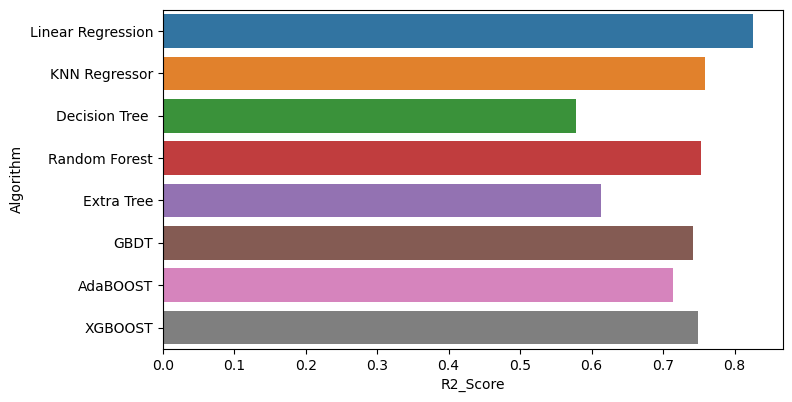

In [15]:
plt.figure(figsize=(8,4.4))
sns.barplot(x=predict['R2_Score'],y=predict['Algorithm'])
plt.show()

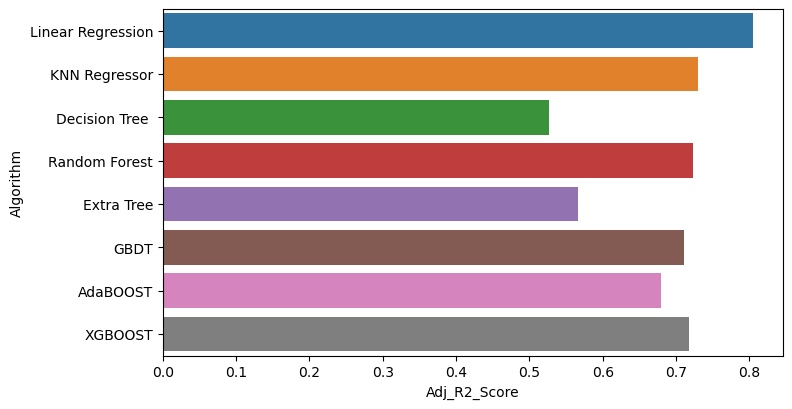

In [14]:
plt.figure(figsize=(8,4.5))
sns.barplot(x=predict['Adj_R2_Score'],y=predict['Algorithm'])
plt.show()

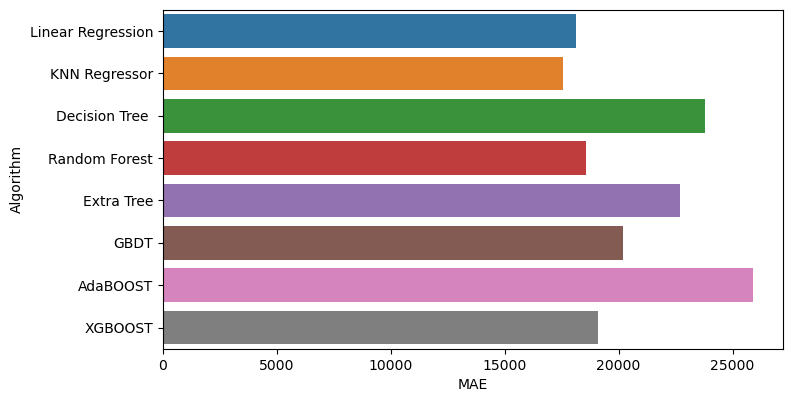

In [16]:
plt.figure(figsize=(8,4.4))
sns.barplot(x=predict['MAE'],y=predict['Algorithm'])
plt.show()

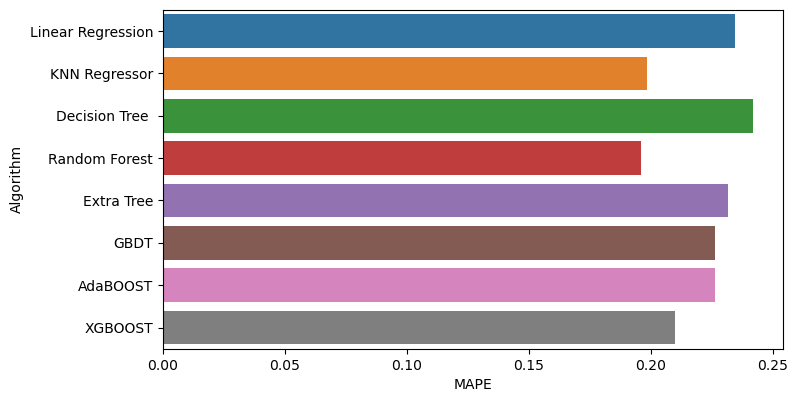

In [18]:
plt.figure(figsize=(8,4.4))
sns.barplot(x=predict['MAPE'],y=predict['Algorithm'])
plt.show()

In [157]:
df

,Company,ProcessorName,Processor,RAM_in_GB,SSD_in_GB,Gen,OperatingSystem,ScreenSize_in_Inch,Warranty_in_Year,Rating,Prices
0,Lenovo,Intel,Intel Core i3,8,256,11.0,Windows 11,14.0,2.0,4.2,36990
1,Lenovo,Intel,Intel Core i3,8,512,11.0,Windows 11,15.6,2.0,4.2,39990
2,ASUS,Intel,Intel Core i3,8,512,10.0,Windows 11,15.6,1.0,4.3,32990
3,HP,AMD,AMD Ryzen 5 Hexa Core,8,512,11.0,Windows 10,15.6,1.0,4.4,49990
4,ASUS,Intel,Intel Core i5,8,512,10.0,Windows 11,15.6,1.0,4.4,49990
...,...,...,...,...,...,...,...,...,...,...,...
401,DELL,Intel,Intel Core i5,16,512,12.0,Windows 11,15.6,1.0,4.2,76590
402,HP,AMD,AMD Ryzen 7 Octa Core,16,512,11.0,Windows 10,15.6,1.0,4.6,90000
403,ASUS,Intel,Intel Core i3,4,0,11.0,os,11.6,1.0,4.0,23490
404,ASUS,Intel,Intel Core i7,16,512,12.0,Windows 11,14.0,1.0,3.0,125990


In [156]:
df=pickle.load(open(r"C:\Users\KISHOR MONDAL\Machine Learning Projects\Laptop Price Predictopn\final_df.sav",'rb'))


In [151]:
import pickle

In [163]:
import pickle

pickle.dump(final_df,open('final_df.sav','wb'))
pickle.dump(pkl,open('pkl.sav','wb'))

In [154]:
pkl=pickle.load(open(r"C:\Users\KISHOR MONDAL\Machine Learning Projects\Laptop Price Predictopn\reg.sav",'rb'))

In [162]:
pkl.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 6]),
                                                 ('sc', StandardScaler(),
                                                  [3, 4, 5, 7, 8, 9])])),
                ('regressor', LinearRegression())])